<a href="https://colab.research.google.com/github/shavirazh/k-means-naive-bayes-hybrid/blob/main/kmnb-hybrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import library

In [ ]:
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import davies_bouldin_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from google.colab import files
uploaded = files.upload()

Saving jabarData_fix.xlsx to jabarData_fix.xlsx


# Load data

In [ ]:

df = pd.read_excel('jabarData_fix.xlsx')
print('Data loaded.\n') 


Data loaded.



In [ ]:
df_grouped = df.drop(['kode_kabupaten_kota','tahun_ajaran'], axis=1)
df_grouped['jumlah_sekolah'] = df_grouped['jumlah_sekolah_sd'] + df_grouped['jumlah_sekolah_smp'] + df_grouped['jumlah_sekolah_sma'] + df_grouped['jumlah_sekolah_smk'] + df_grouped['jumlah_sekolah_slb']
df_grouped['jumlah_murid'] = df_grouped['jumlah_murid_sd'] + df_grouped['jumlah_murid_smp'] + df_grouped['jumlah_murid_sma'] + df_grouped['jumlah_murid_smk'] + df_grouped['jumlah_murid_slb']
df_grouped['jumlah_guru'] = df_grouped['jumlah_guru_sd'] + df_grouped['jumlah_guru_smp'] + df_grouped['jumlah_guru_sma'] + df_grouped['jumlah_guru_smk'] + df_grouped['jumlah_guru_slb']
df_grouped = df_grouped[['nama_kabupaten_kota','jumlah_sekolah','jumlah_murid','jumlah_guru']]

df_grouped.head()

,nama_kabupaten_kota,jumlah_sekolah,jumlah_murid,jumlah_guru
0,KABUPATEN BOGOR,2974,888970,36112
1,KABUPATEN SUKABUMI,1776,463230,23692
2,KABUPATEN CIANJUR,1814,473621,24038
3,KABUPATEN BANDUNG,2006,524519,24785
4,KABUPATEN GARUT,2274,610223,26027


In [ ]:
df = df_grouped.copy()

# Exploratory Data Analysis

## The first 5 rows

In [ ]:
df.head()

,kode_kabupaten_kota,nama_kabupaten_kota,tahun_ajaran,jumlah_sekolah_sd,jumlah_sekolah_smp,jumlah_sekolah_sma,jumlah_sekolah_smk,jumlah_sekolah_slb,jumlah_murid_sd,jumlah_murid_smp,jumlah_murid_sma,jumlah_murid_smk,jumlah_murid_slb,jumlah_guru_sd,jumlah_guru_smp,jumlah_guru_sma,jumlah_guru_smk,jumlah_guru_slb
0,3201,KABUPATEN BOGOR,2015/2016,1795,648,173,352,6,510841,202865,61153,113581,530,20491,8372,2950,4235,64
1,3202,KABUPATEN SUKABUMI,2015/2016,1209,324,77,155,11,231697,110222,59843,59507,1961,13490,5169,2353,2588,92
2,3203,KABUPATEN CIANJUR,2015/2016,1256,289,86,175,8,286310,104226,36226,45234,1625,10688,5398,3832,3592,528
3,3204,KABUPATEN BANDUNG,2015/2016,1415,304,107,137,43,304777,115259,46428,57456,599,14190,5462,2100,2639,394
4,3205,KABUPATEN GARUT,2015/2016,1586,364,120,171,33,370266,138763,47270,51498,2426,15396,5517,2208,2310,596


## Duplicated & missing values count

In [ ]:
print(df.duplicated().sum())

print('------------')

print(df.isnull().sum())

0
------------
kode_kabupaten_kota    0
nama_kabupaten_kota    0
tahun_ajaran           0
jumlah_sekolah_sd      0
jumlah_sekolah_smp     0
jumlah_sekolah_sma     0
jumlah_sekolah_smk     0
jumlah_sekolah_slb     0
jumlah_murid_sd        0
jumlah_murid_smp       0
jumlah_murid_sma       0
jumlah_murid_smk       0
jumlah_murid_slb       0
jumlah_guru_sd         0
jumlah_guru_smp        0
jumlah_guru_sma        0
jumlah_guru_smk        0
jumlah_guru_slb        0
dtype: int64


## Descriptive statistics

In [ ]:
df.describe()

,kode_kabupaten_kota,jumlah_sekolah_sd,jumlah_sekolah_smp,jumlah_sekolah_sma,jumlah_sekolah_smk,jumlah_sekolah_slb,jumlah_murid_sd,jumlah_murid_smp,jumlah_murid_sma,jumlah_murid_smk,jumlah_murid_slb,jumlah_guru_sd,jumlah_guru_smp,jumlah_guru_sma,jumlah_guru_smk,jumlah_guru_slb
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,3231.333333,728.429630,192.770370,59.370370,107.103704,14.096296,166973.511111,66088.429630,25209.266667,39267.696296,854.933333,7456.451852,3135.600000,1303.311111,1868.140741,156.296296
std,31.318060,456.502776,140.079239,43.909803,70.237792,11.624006,114268.512682,43677.715549,16428.051734,24340.226321,545.880901,4308.148634,1803.714022,837.063412,940.819991,131.509552
min,3201.000000,86.000000,24.000000,5.000000,15.000000,3.000000,15543.000000,7802.000000,3211.000000,7141.000000,168.000000,297.000000,244.000000,191.000000,465.000000,32.000000
25%,3207.000000,284.000000,103.500000,25.500000,52.500000,6.000000,94747.500000,38690.500000,14522.000000,20854.500000,530.000000,4465.000000,1825.000000,818.500000,1221.500000,70.500000
50%,3214.000000,706.000000,165.000000,49.000000,107.000000,10.000000,157541.000000,62039.000000,20161.000000,38192.000000,686.000000,6975.000000,2937.000000,1145.000000,1698.000000,113.000000
75%,3273.000000,949.000000,265.500000,86.500000,139.000000,14.000000,232277.500000,93842.500000,32258.500000,53676.000000,970.500000,10127.500000,4230.000000,1351.500000,2499.000000,151.500000
max,3279.000000,1846.000000,729.000000,189.000000,361.000000,46.000000,532036.000000,210751.000000,71831.000000,133945.000000,2821.000000,20491.000000,8723.000000,3835.000000,5033.000000,596.000000


In [ ]:
df_grouped.describe()

,jumlah_sekolah,jumlah_murid,jumlah_guru
count,135.000000,135.000000,135.000000
mean,1101.770370,298393.837037,13919.800000
std,672.796347,191940.818979,7411.485112
min,136.000000,34930.000000,2154.000000
25%,585.000000,171405.000000,8724.000000
50%,1010.000000,278024.000000,12701.000000
75%,1533.500000,406641.500000,17593.500000
max,3131.000000,949146.000000,36112.000000


In [ ]:
df_grouped.tail(20)

,nama_kabupaten_kota,jumlah_sekolah,jumlah_murid,jumlah_guru
115,KABUPATEN KUNINGAN,850,189541,12500
116,KABUPATEN CIREBON,1301,358766,16734
117,KABUPATEN MAJALENGKA,876,196361,11860
118,KABUPATEN SUMEDANG,875,193748,11300
119,KABUPATEN INDRAMAYU,1312,292478,13175
120,KABUPATEN SUBANG,1214,265478,12459
121,KABUPATEN PURWAKARTA,610,176244,8036
122,KABUPATEN KARAWANG,1256,408886,15595
123,KABUPATEN BEKASI,1657,556692,23064
124,KABUPATEN BANDUNG BARAT,1073,281516,12701


## Data correlation

In [ ]:
df.corr()

,kode_kabupaten_kota,jumlah_sekolah_sd,jumlah_sekolah_smp,jumlah_sekolah_sma,jumlah_sekolah_smk,jumlah_sekolah_slb,jumlah_murid_sd,jumlah_murid_smp,jumlah_murid_sma,jumlah_murid_smk,jumlah_murid_slb,jumlah_guru_sd,jumlah_guru_smp,jumlah_guru_sma,jumlah_guru_smk,jumlah_guru_slb
kode_kabupaten_kota,1.000000,-0.724801,-0.441442,-0.212781,-0.408862,-0.164721,-0.457967,-0.444549,-0.282386,-0.355268,-0.270367,-0.535627,-0.464251,-0.195543,-0.403745,-0.188288
jumlah_sekolah_sd,-0.724801,1.000000,0.793434,0.671158,0.758632,0.286646,0.886608,0.803438,0.675025,0.717533,0.390127,0.889697,0.775781,0.538886,0.587771,0.268740
jumlah_sekolah_smp,-0.441442,0.793434,1.000000,0.920763,0.974117,0.247605,0.859976,0.952149,0.866156,0.921384,0.346807,0.809654,0.903256,0.729712,0.689423,0.227649
jumlah_sekolah_sma,-0.212781,0.671158,0.920763,1.000000,0.900777,0.381480,0.817562,0.926487,0.937932,0.900098,0.414444,0.750760,0.862802,0.807457,0.668558,0.321904
jumlah_sekolah_smk,-0.408862,0.758632,0.974117,0.900777,1.000000,0.196809,0.829485,0.933285,0.830081,0.934219,0.288388,0.792870,0.894699,0.722209,0.709698,0.172632
jumlah_sekolah_slb,-0.164721,0.286646,0.247605,0.381480,0.196809,1.000000,0.277729,0.318702,0.400936,0.229749,0.813592,0.274529,0.274884,0.295616,0.233311,0.843468
jumlah_murid_sd,-0.457967,0.886608,0.859976,0.817562,0.829485,0.277729,1.000000,0.906523,0.832065,0.839818,0.364050,0.935744,0.834383,0.689240,0.620049,0.249821
jumlah_murid_smp,-0.444549,0.803438,0.952149,0.926487,0.933285,0.318702,0.906523,1.000000,0.937217,0.952752,0.419449,0.847528,0.929165,0.792644,0.733498,0.300201
jumlah_murid_sma,-0.282386,0.675025,0.866156,0.937932,0.830081,0.400936,0.832065,0.937217,1.000000,0.895298,0.499274,0.758682,0.855569,0.836241,0.674776,0.376701
jumlah_murid_smk,-0.355268,0.717533,0.921384,0.900098,0.934219,0.229749,0.839818,0.952752,0.895298,1.000000,0.303566,0.785933,0.895166,0.765257,0.730725,0.183258


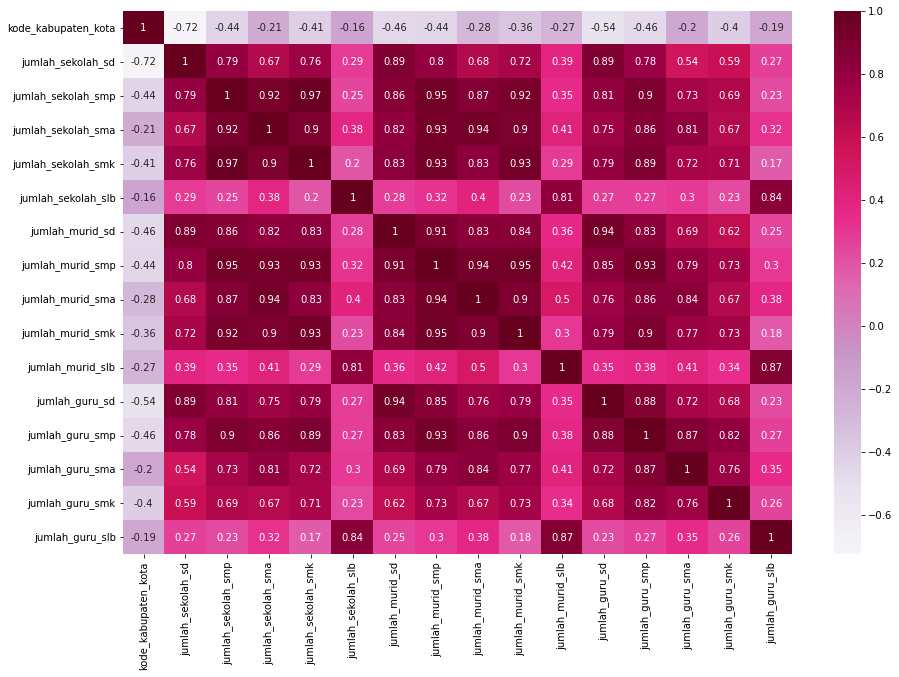

In [ ]:
# Memeriksa korelasi menggunakan heatmap
plt.figure(figsize=(15, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap="PuRd")

## Distribution of each variables

In [ ]:
# Membuat fungsi untuk memunculkan histogram dan boxplot masing-masing kolom
def feat_plot(feature):
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 3, 1)
    feature.plot(kind = 'hist')
    plt.title(f'{feature.name}')
    
    #mean = feature.describe().mean()
    plt.subplot(1, 3, 2)
    mu, sigma = scipy.stats.norm.fit(feature)
    sns.distplot(feature) 
    #plt.legend({'--': mu, 'sigma': sigma})
    plt.axvline(mu, linestyle = '--', color = 'green', )
    plt.axvline(sigma, linestyle = '--', color = 'red')
    plt.title(f'{feature.name} distribution')
    
    plt.subplot(1, 3, 3)
    feature.plot(kind = 'box')
    plt.title(f'{feature.name}')
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


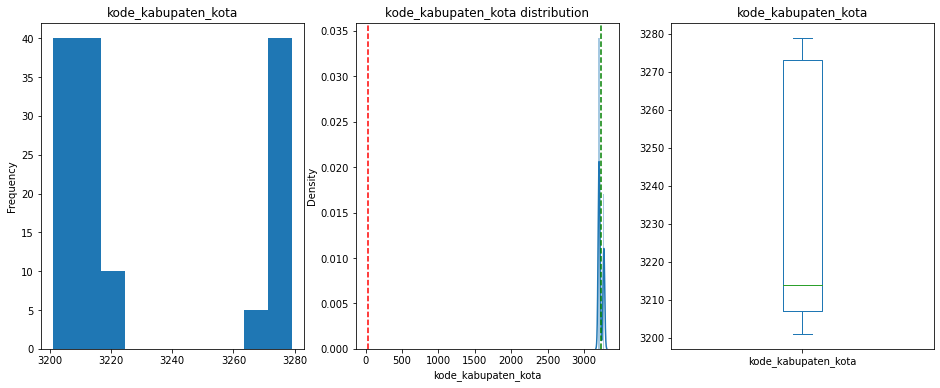

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


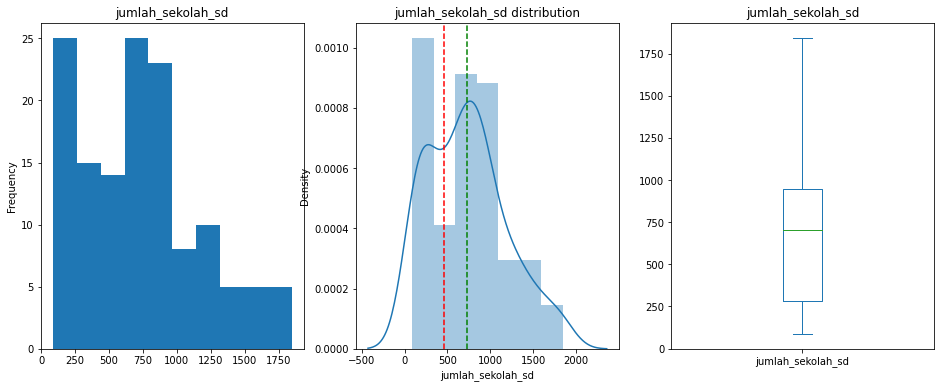

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


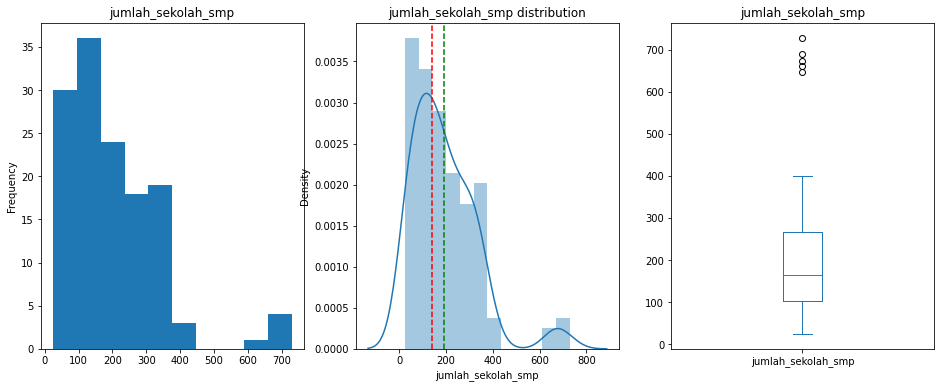

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


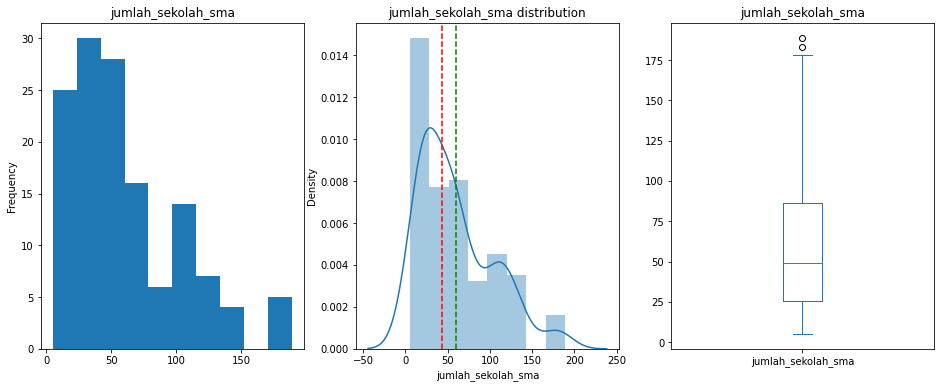

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


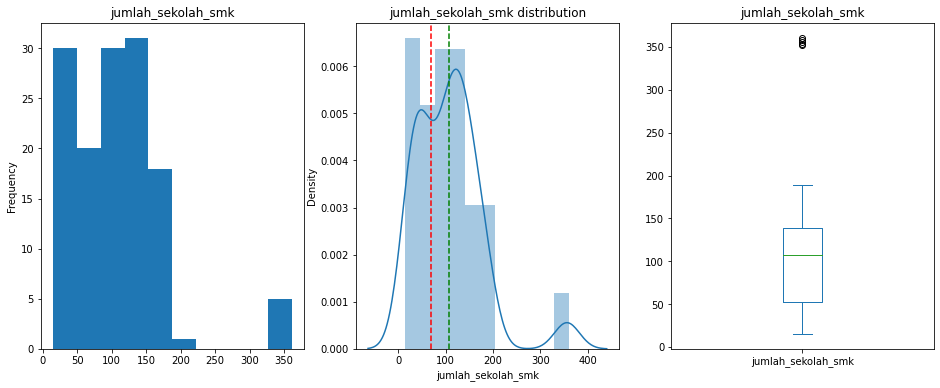

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


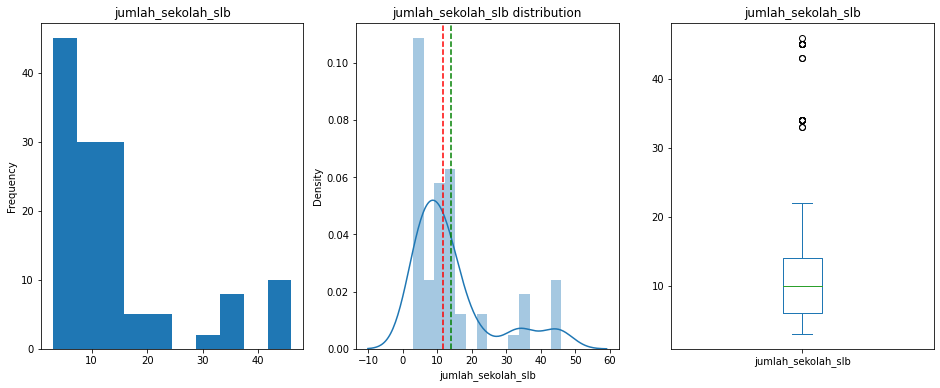

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


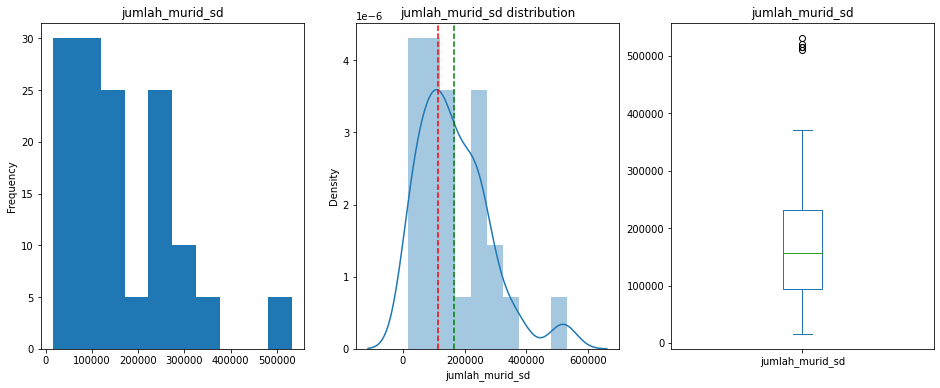

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


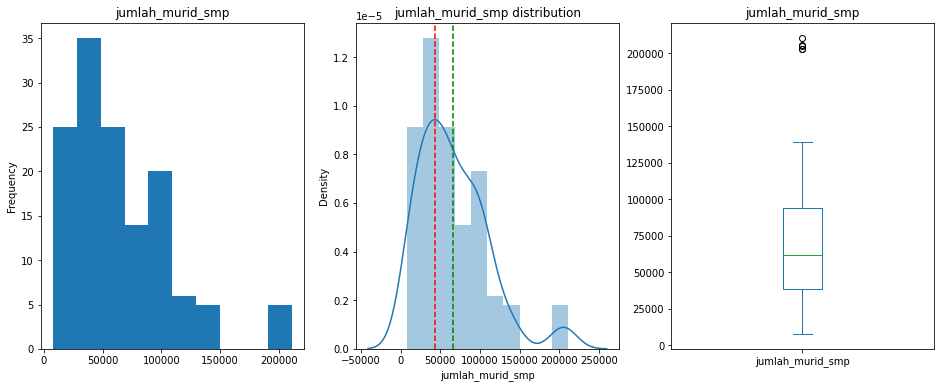

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


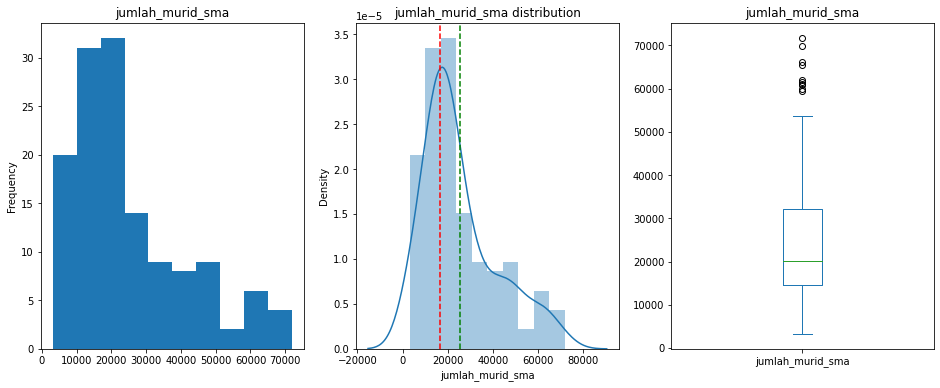

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


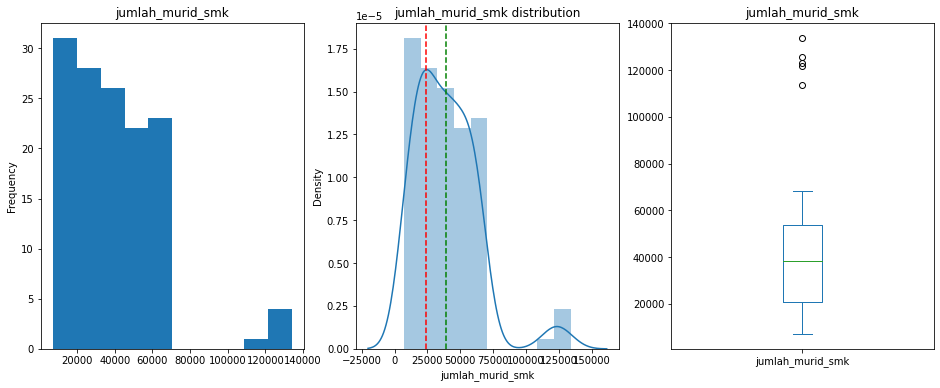

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


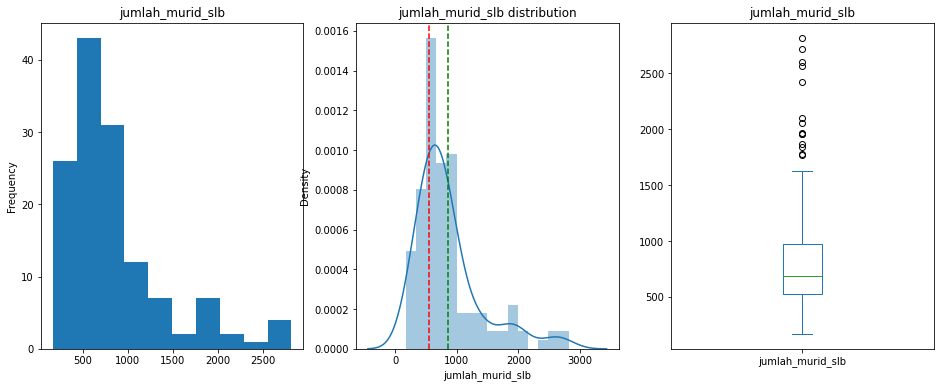

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


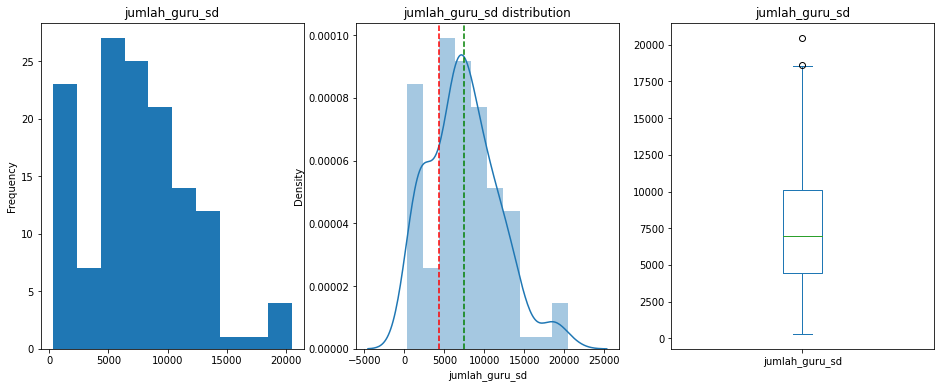

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


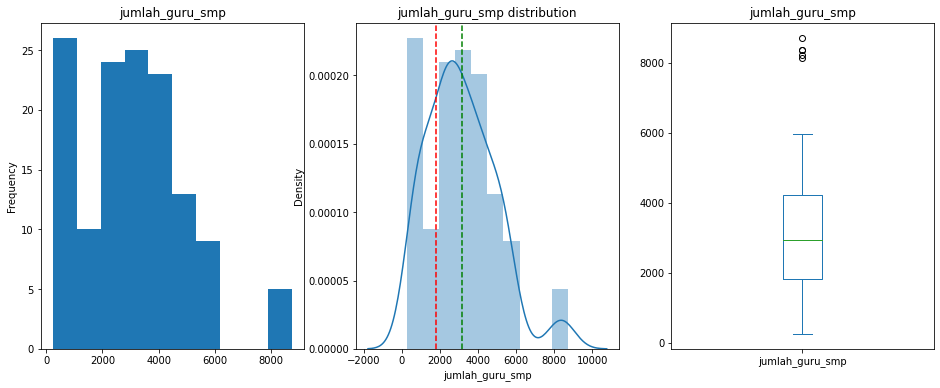

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


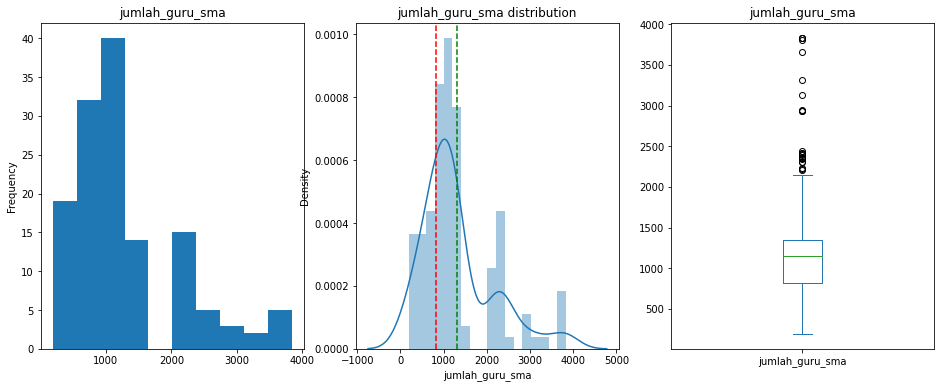

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


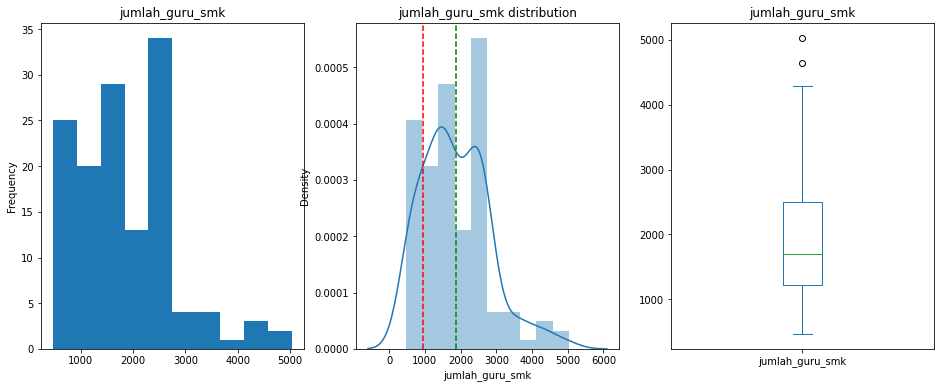

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


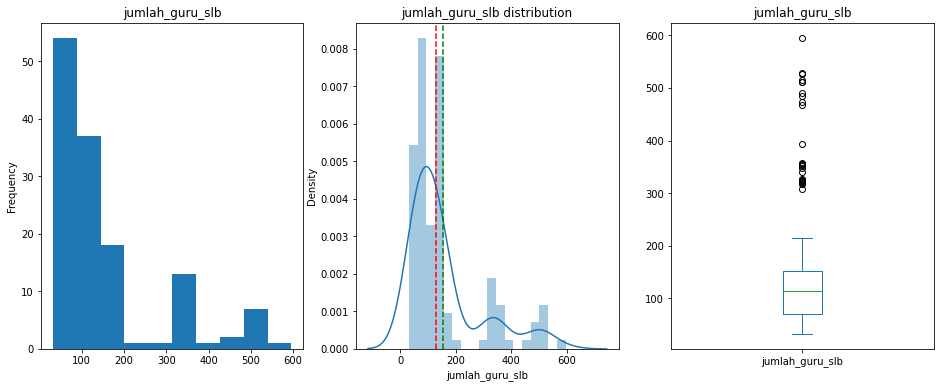

In [ ]:
# Memunculkan plot masing-masing kolom numerik. Kolom kategorik tidak disertakan
num_feature = df.select_dtypes(exclude='object')

for i in num_feature.columns:
    feat_plot(num_feature[i])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


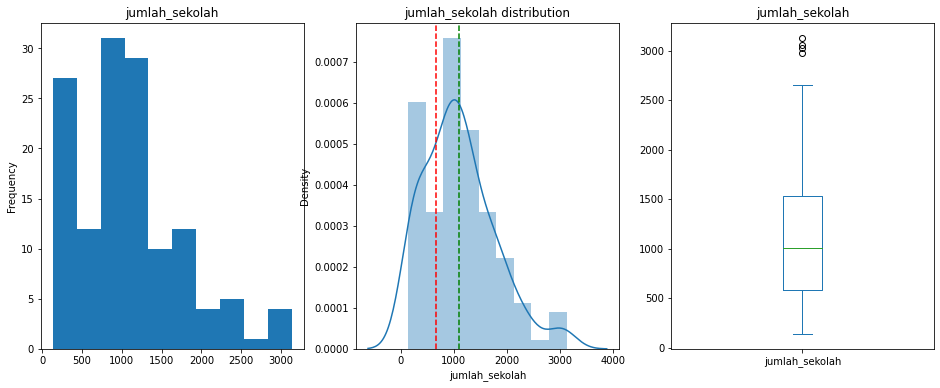

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


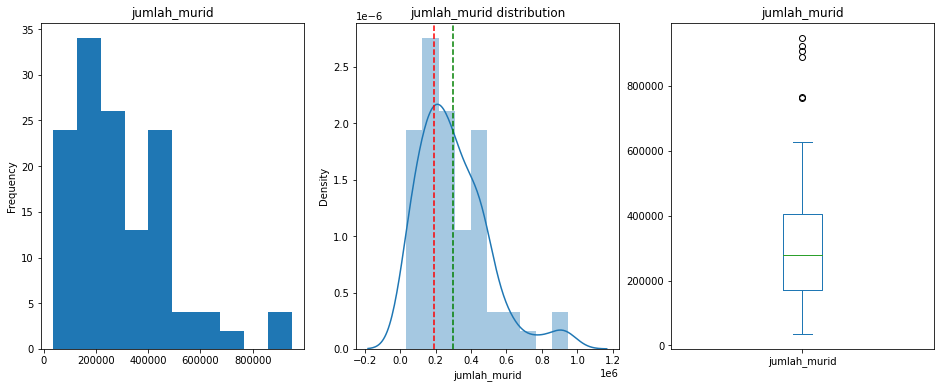

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


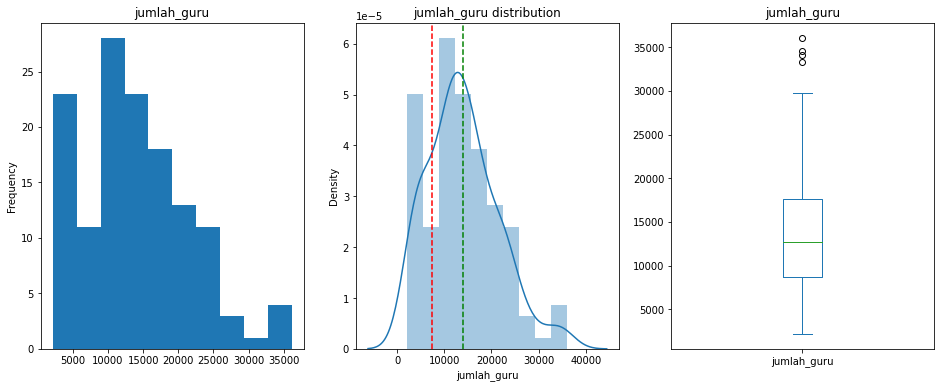

In [ ]:
# Memunculkan plot masing-masing kolom numerik. Kolom kategorik tidak disertakan
num_feature = df_grouped.select_dtypes(exclude='object')

for i in num_feature.columns:
    feat_plot(num_feature[i])

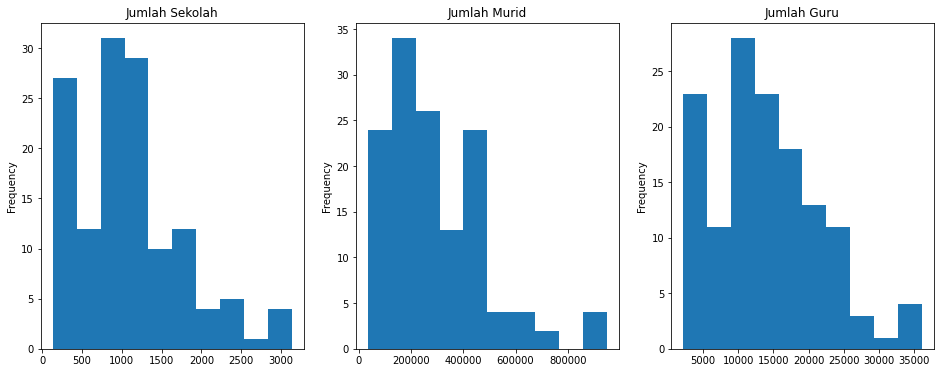

<Figure size 1080x504 with 0 Axes>

In [ ]:
#plt.figure(figsize=(16, 6))
#plt.subplot(1, 3, 1)
#feature.plot(kind = 'hist')
#plt.title(f'{feature.name}')

ax1 = plt.subplot(1,3,1)
ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)

plt.figure(figsize=(15,7))
df_grouped['jumlah_sekolah'].plot(kind='hist', ax=ax1, figsize=(16,6))
ax1.set_title('Jumlah Sekolah')
df_grouped['jumlah_murid'].plot(kind='hist', ax=ax2, figsize=(16,6))
ax2.set_title('Jumlah Murid')
df_grouped['jumlah_guru'].plot(kind='hist', ax=ax3, figsize=(16,6))
ax3.set_title('Jumlah Guru')
plt.show()

# Preprocessing data

## Dropping unnecessary columns

In [ ]:
df.drop(['kode_kabupaten_kota','nama_kabupaten_kota','tahun_ajaran'], axis=1, inplace=True)

## Standardizing the data

In [ ]:
# Standardizing the data
scaler = StandardScaler()
scaler.fit(df)
scaled_features = scaler.transform(df)
df_scaled = pd.DataFrame(scaled_features,columns = df.columns)
df_scaled.head()

,jumlah_sekolah_sd,jumlah_sekolah_smp,jumlah_sekolah_sma,jumlah_sekolah_smk,jumlah_sekolah_slb,jumlah_murid_sd,jumlah_murid_smp,jumlah_murid_sma,jumlah_murid_smk,jumlah_murid_slb,jumlah_guru_sd,jumlah_guru_smp,jumlah_guru_sma,jumlah_guru_smk,jumlah_guru_slb
0,2.345096,3.261904,2.597434,3.499660,-0.699109,3.020501,3.143158,2.196097,3.064478,-0.597463,3.036825,2.913933,1.974548,2.525110,-0.704436
1,1.056642,0.940313,0.402992,0.684456,-0.267363,0.568525,1.014200,2.116059,0.834614,2.033752,1.405713,1.131539,1.258684,0.767990,-0.490731
2,1.159983,0.689524,0.608721,0.970264,-0.526411,1.048241,0.876411,0.673103,0.246034,1.415940,0.752895,1.258972,3.032156,1.839119,2.836966
3,1.509580,0.797005,1.088755,0.427229,2.495814,1.210454,1.129952,1.296426,0.750036,-0.470591,1.568801,1.294587,0.955311,0.822400,1.814233
4,1.885562,1.226930,1.385919,0.913102,1.632321,1.785703,1.670079,1.347871,0.504344,2.888758,1.849778,1.325193,1.084814,0.471403,3.355964


# PCA

In [ ]:
import numpy as np
from numpy.linalg import eig
#a = np.array(df_scaled)
#b = a @ a.T
w,v=eig(np.array(df_scaled.cov()))
print('E-value:', w)
print('E-vector', v)

E-value: [1.05199508e+01 2.32221907e+00 7.13943599e-01 5.15330997e-01
 2.98512261e-01 2.01517696e-01 1.51989994e-01 1.10221320e-01
 8.42585247e-02 7.19884902e-02 4.34498459e-02 3.10259168e-02
 2.22920363e-02 9.66831251e-03 1.55714496e-02]
E-vector [[ 0.25689975  0.04313457 -0.58454805  0.21293539  0.1105567  -0.10959647
  -0.04407903 -0.00971519 -0.22093142  0.61329326  0.29458168  0.07434541
   0.02034736  0.004241    0.033994  ]
 [ 0.29195143  0.111419   -0.03560226 -0.23705281  0.2622957  -0.13943617
  -0.26945326 -0.08312349 -0.19743516 -0.08214479 -0.17471125 -0.28833664
  -0.17781802 -0.13436014 -0.68415658]
 [ 0.28890065  0.02191724  0.16946522 -0.35549181 -0.05825906  0.15435792
  -0.04113738  0.01942053 -0.54576356 -0.08741059  0.0367024   0.42630299
   0.47451269 -0.10868321  0.07822478]
 [ 0.28598818  0.14944248  0.01765618 -0.20792497  0.35875702 -0.08448354
  -0.32168629 -0.08432333  0.0225591  -0.28039381  0.26372695 -0.02118452
  -0.3513356   0.25089161  0.51998367]
 [ 0

In [ ]:
eigen_value = pd.DataFrame(w)
eigen_value = eigen_value.rename(columns={0:"nilai eigen"})
eigen_value

,nilai eigen
0,10.519951
1,2.322219
2,0.713944
3,0.515331
4,0.298512
5,0.201518
6,0.151990
7,0.110221
8,0.084259
9,0.071988


In [ ]:
df_scaled.cov()

,jumlah_sekolah_sd,jumlah_sekolah_smp,jumlah_sekolah_sma,jumlah_sekolah_smk,jumlah_sekolah_slb,jumlah_murid_sd,jumlah_murid_smp,jumlah_murid_sma,jumlah_murid_smk,jumlah_murid_slb,jumlah_guru_sd,jumlah_guru_smp,jumlah_guru_sma,jumlah_guru_smk,jumlah_guru_slb
jumlah_sekolah_sd,1.007463,0.799355,0.676167,0.764293,0.288785,0.893224,0.809434,0.680062,0.722887,0.393039,0.896337,0.781570,0.542907,0.592157,0.270746
jumlah_sekolah_smp,0.799355,1.007463,0.927634,0.981386,0.249453,0.866393,0.959254,0.872620,0.928260,0.349396,0.815696,0.909997,0.735157,0.694568,0.229348
jumlah_sekolah_sma,0.676167,0.927634,1.007463,0.907499,0.384327,0.823663,0.933401,0.944932,0.906815,0.417537,0.756363,0.869241,0.813482,0.673547,0.324306
jumlah_sekolah_smk,0.764293,0.981386,0.907499,1.007463,0.198278,0.835675,0.940250,0.836275,0.941191,0.290540,0.798787,0.901376,0.727599,0.714994,0.173920
jumlah_sekolah_slb,0.288785,0.249453,0.384327,0.198278,1.007463,0.279801,0.321080,0.403928,0.231464,0.819664,0.276577,0.276936,0.297822,0.235052,0.849762
jumlah_murid_sd,0.893224,0.866393,0.823663,0.835675,0.279801,1.007463,0.913288,0.838275,0.846085,0.366767,0.942727,0.840610,0.694383,0.624677,0.251685
jumlah_murid_smp,0.809434,0.959254,0.933401,0.940250,0.321080,0.913288,1.007463,0.944211,0.959862,0.422580,0.853853,0.936099,0.798559,0.738972,0.302441
jumlah_murid_sma,0.680062,0.872620,0.944932,0.836275,0.403928,0.838275,0.944211,1.007463,0.901979,0.503000,0.764343,0.861954,0.842482,0.679812,0.379512
jumlah_murid_smk,0.722887,0.928260,0.906815,0.941191,0.231464,0.846085,0.959862,0.901979,1.007463,0.305831,0.791798,0.901846,0.770968,0.736178,0.184626
jumlah_murid_slb,0.393039,0.349396,0.417537,0.290540,0.819664,0.366767,0.422580,0.503000,0.305831,1.007463,0.351673,0.382280,0.414259,0.347508,0.880028


In [ ]:
w.shape

(135,)

In [ ]:
v.shape

(135, 135)

In [ ]:
pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(df_scaled)
print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))

print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))

Explained variation per principal component: [0.69613501 0.15366783]
Cumulative variance explained by 2 principal components: 84.98%


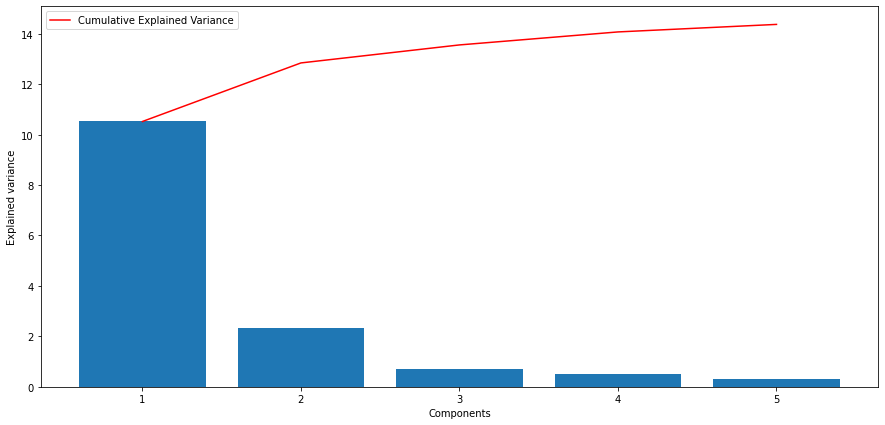

In [ ]:
plt.figure(figsize=(15,7))
plt.bar(range(1,len(pca_2.explained_variance_ )+1),pca_2.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pca_2.explained_variance_ )+1),
         np.cumsum(pca_2.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

In [ ]:
nana = np.cov(np.array(df_scaled))

nana

array([[ 2.22884989,  0.29107019, -0.23790212, ..., -0.43884925,
        -0.29484315, -0.27056408],
       [ 0.29107019,  0.49737184,  0.00659203, ..., -0.10690933,
        -0.01353007, -0.09144189],
       [-0.23790212,  0.00659203,  0.826577  , ...,  0.10234649,
         0.07583703,  0.03828933],
       ...,
       [-0.43884925, -0.10690933,  0.10234649, ...,  0.15794256,
         0.05078628,  0.10054369],
       [-0.29484315, -0.01353007,  0.07583703, ...,  0.05078628,
         0.07709581,  0.02226939],
       [-0.27056408, -0.09144189,  0.03828933, ...,  0.10054369,
         0.02226939,  0.07177449]])

In [ ]:
pca_2_result

array([[ 9.19009515e+00, -3.53553099e+00],
       [ 3.64017536e+00, -2.43921102e-02],
       [ 4.09644444e+00,  1.41636277e+00],
       [ 4.05673629e+00,  1.43584567e+00],
       [ 5.41027301e+00,  3.42645323e+00],
       [ 1.88405094e+00, -8.53558176e-01],
       [-1.04360029e+00,  1.87253024e-01],
       [-1.75479453e+00,  3.69368325e-01],
       [ 4.82637237e-01, -2.97235675e-01],
       [-1.35298846e+00,  9.50161121e-01],
       [-1.40359190e+00,  1.55919425e+00],
       [ 8.16370676e-01, -8.60950975e-01],
       [-4.55882526e-01, -3.60481069e-01],
       [-2.09199746e+00, -5.11222900e-01],
       [-2.70203782e-01, -1.55981241e+00],
       [ 2.64393714e+00, -1.18132522e+00],
       [-5.45798246e-01,  6.53999579e-01],
       [-3.70500465e+00,  1.22648505e-01],
       [-2.10799614e+00,  3.40379006e-01],
       [-4.10791802e+00, -6.68113308e-01],
       [ 1.83215763e+00,  4.26826042e-01],
       [-4.02558568e+00, -3.59931263e-01],
       [ 6.25262973e-01, -9.28961024e-01],
       [-1.

In [ ]:
data = pd.DataFrame(pca_2_result)
data = data.rename(columns={0:'KU1',
                            1:'KU2'})
data

,KU1,KU2
0,9.190095,-3.535531
1,3.640175,-0.024392
2,4.096444,1.416363
3,4.056736,1.435846
4,5.410273,3.426453
...,...,...
130,2.298692,-0.482691
131,-0.436206,-0.607883
132,-3.539341,0.305011
133,-3.035940,0.064091


Text(0, 0.5, 'KU2')

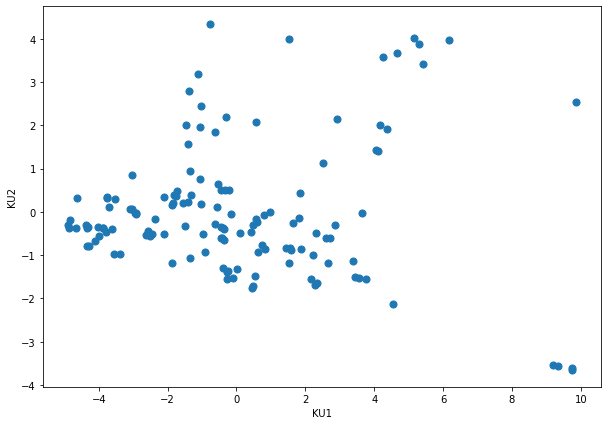

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(data=data, x="PCA1", y="PCA2", s=50)
plt.xlabel("KU1")
plt.ylabel("KU2")

In [ ]:
# Results from pca.components_
dataset_pca = pd.DataFrame(abs(pca_2.components_), columns=df_scaled.columns, index=['PC_1', 'PC_2'])
print('\n\n', dataset_pca)



       jumlah_sekolah  jumlah_murid  jumlah_guru
PC_1        0.575878       0.58121     0.574943
PC_2        0.677320       0.05464     0.733657


In [ ]:
print("\n*************** Most important features *************************")
print('As per PC 1:\n', (dataset_pca[dataset_pca > 0.25].iloc[0]).dropna())   
print('\n\nAs per PC 2:\n', (dataset_pca[dataset_pca > 0.25].iloc[1]).dropna())
print("\n******************************************************************")


*************** Most important features *************************
As per PC 1:
 jumlah_sekolah    0.575878
jumlah_murid      0.581210
jumlah_guru       0.574943
Name: PC_1, dtype: float64


As per PC 2:
 jumlah_sekolah    0.677320
jumlah_guru       0.733657
Name: PC_2, dtype: float64

******************************************************************


# Initiate number of cluster with Elbow method graphic

In [ ]:
print(data[data['PCA1']<-2.3])
#data.loc[11]

         PCA1      PCA2
17  -3.705005  0.122649
19  -4.107918 -0.668113
21  -4.025586 -0.359931
24  -4.364751 -0.306143
25  -2.932985 -0.051865
26  -4.884491 -0.298461
40  -2.451314 -0.505007
44  -4.341488 -0.382521
47  -4.279895 -0.791914
48  -3.880114 -0.373680
51  -3.762658  0.311078
52  -3.098216  0.062142
53  -4.842304 -0.199708
67  -2.507758 -0.562923
71  -3.036193  0.839465
73  -3.993289 -0.555743
75  -2.940798 -0.035187
78  -2.377009 -0.166608
79  -3.543118 -0.970122
80  -4.619752  0.310751
94  -2.618492 -0.531881
98  -4.324977 -0.358362
100 -3.396591 -0.983736
102 -3.863248 -0.371489
105 -3.758237  0.342082
106 -2.919392 -0.033858
107 -4.876581 -0.370976
121 -2.584223 -0.454375
125 -3.775713 -0.470359
127 -4.339517 -0.798949
129 -3.628878 -0.397641
132 -3.539341  0.305011
133 -3.035940  0.064091
134 -4.662412 -0.380986


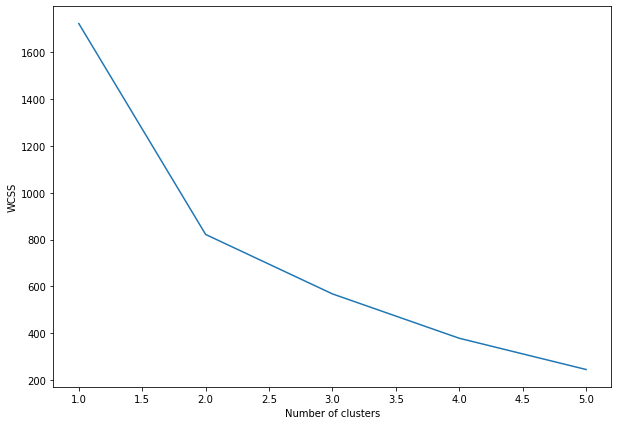

In [ ]:
X = data

wcss = []
for i in range(1,6):
   model = KMeans(n_clusters = i, init = "k-means++")
   model.fit(X)
   wcss.append(model.inertia_)
plt.figure(figsize=(10,7))
plt.plot(range(1,6), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
model.inertia_

245.6969577836262

**Number of cluster based on Elbow graph method: 4 & 5**

# Clustering & Classification of 4 Clusters

## K-means clustering of 4 clusters

In [ ]:
data = pd.DataFrame(pca_2_result)
data = data.rename(columns={0:'PCA1',
                            1:'PCA2'})
data.head(3)

,PCA1,PCA2
0,9.190095,-3.535531
1,3.640175,-0.024392
2,4.096444,1.416363


In [ ]:
X = data

In [ ]:
model = KMeans(n_clusters = 4, init = "k-means++")

In [ ]:
y = model.fit_predict(X)

In [ ]:
model.cluster_centers_

array([[-2.67999438,  0.23882509],
       [ 4.76403147,  2.92299856],
       [ 1.04916858, -0.65494722],
       [ 9.503869  , -3.58538688]])

In [ ]:
data['clusters'] = y

In [ ]:
data['clusters'].value_counts()

0    60
2    58
1    13
3     4
Name: clusters, dtype: int64

In [ ]:
model.n_iter_

9

In [ ]:
data_k4 = data.copy()
data_k4.head()

,PCA1,PCA2,clusters
0,9.190095,-3.535531,3
1,3.640175,-0.024392,2
2,4.096444,1.416363,1
3,4.056736,1.435846,1
4,5.410273,3.426453,1


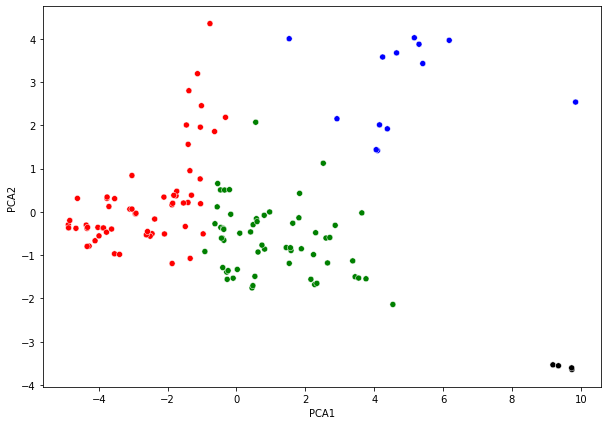

In [ ]:
# Membuat visualisasi klaster
plt.figure(figsize=(10,7))
ax = sns.scatterplot(x="PCA1", y="PCA2", hue = "clusters", data = data_k4, palette =['red','green','blue','black'], legend=False)
plt.show(ax)

In [ ]:
data

,PCA1,PCA2,clusters
0,9.190095,-3.535531,3
1,3.640175,-0.024392,2
2,4.096444,1.416363,1
3,4.056736,1.435846,1
4,5.410273,3.426453,1
...,...,...,...
130,2.298692,-0.482691,2
131,-0.436206,-0.607883,2
132,-3.539341,0.305011,0
133,-3.035940,0.064091,0


In [ ]:
# we store the cluster labels
labels = model.labels_
X = data
 
print(davies_bouldin_score(X, labels))

0.5811110519652919


In [ ]:
# Calculate Silhoutte Score
#
score = silhouette_score(X, labels, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.502


### Manual calculation

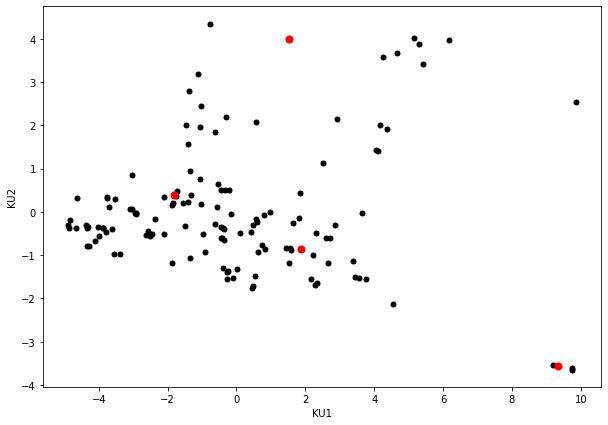

In [ ]:
K=4

# Select random observation as centroids
Centroids = data.loc[[5,27,88,101]]
plt.figure(figsize=(10,7))
plt.scatter(data["PCA1"],data["PCA2"],c='black',s=25)
plt.scatter(Centroids["PCA1"],Centroids["PCA2"],c='red', s=50)
plt.xlabel('KU1')
plt.ylabel('KU2')
plt.show()

In [ ]:
Centroids = data.loc[[5,27,88,101]]
Centroids = np.array(Centroids)
Centroids

array([[ 1.88405094, -0.85355818],
       [ 9.35024883, -3.55713891],
       [-1.82061344,  0.38177646],
       [ 1.53059127,  4.00012586]])

In [ ]:
dist = np.linalg.norm(data - Centroids[0,:],axis=1).reshape(-1,1)
dist[:10,:]

array([[7.78275402],
       [1.94203227],
       [3.16973596],
       [3.15625278],
       [5.54551528],
       [0.        ],
       [3.10715781],
       [3.8388469 ],
       [1.50779809],
       [3.70564804]])

In [ ]:
dist = np.append(dist,np.linalg.norm(data - Centroids[1,:],axis=1).reshape(-1,1),axis=1)
dist[:10,:]

array([[ 7.78275402,  0.16160478],
       [ 1.94203227,  6.71455427],
       [ 3.16973596,  7.23451309],
       [ 3.15625278,  7.27675546],
       [ 5.54551528,  8.018352  ],
       [ 0.        ,  7.94062087],
       [ 3.10715781, 11.04774052],
       [ 3.8388469 , 11.77877103],
       [ 1.50779809,  9.44783068],
       [ 3.70564804, 11.61357146]])

In [ ]:
dist = np.append(dist,np.linalg.norm(data - Centroids[2,:],axis=1).reshape(-1,1),axis=1)
dist[:10,:]

array([[ 7.78275402,  0.16160478, 11.68678746],
       [ 1.94203227,  6.71455427,  5.47587319],
       [ 3.16973596,  7.23451309,  6.00682468],
       [ 3.15625278,  7.27675546,  5.97112231],
       [ 5.54551528,  8.018352  ,  7.84574888],
       [ 0.        ,  7.94062087,  3.90520036],
       [ 3.10715781, 11.04774052,  0.80099239],
       [ 3.8388469 , 11.77877103,  0.06697829],
       [ 1.50779809,  9.44783068,  2.40125408],
       [ 3.70564804, 11.61357146,  0.73602598]])

In [ ]:
dist = np.append(dist,np.linalg.norm(data - Centroids[3,:],axis=1).reshape(-1,1),axis=1)
dist[:10,:]

array([[ 7.78275402,  0.16160478, 11.68678746, 10.74495806],
       [ 1.94203227,  6.71455427,  5.47587319,  4.5439069 ],
       [ 3.16973596,  7.23451309,  6.00682468,  3.64135059],
       [ 3.15625278,  7.27675546,  5.97112231,  3.59957519],
       [ 5.54551528,  8.018352  ,  7.84574888,  3.92186571],
       [ 0.        ,  7.94062087,  3.90520036,  4.86653701],
       [ 3.10715781, 11.04774052,  0.80099239,  4.60048491],
       [ 3.8388469 , 11.77877103,  0.06697829,  4.89654573],
       [ 1.50779809,  9.44783068,  2.40125408,  4.42329332],
       [ 3.70564804, 11.61357146,  0.73602598,  4.19729877]])

In [ ]:
classes = np.argmin(dist,axis=1)
classes

array([1, 0, 0, 0, 3, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 1, 0, 0, 3, 2, 3, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 3, 2, 2, 2, 0, 2, 2, 2, 2, 1, 0, 0, 0, 0, 2, 2, 3, 0, 2, 2, 0,
       2, 2, 0, 0, 3, 2, 3, 2, 0, 2, 0, 2, 2, 2, 2, 1, 0, 0, 3, 3, 0, 2,
       2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 3, 2, 0, 2, 2, 2, 2, 1, 0,
       0, 3, 3, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 3, 2, 0, 2,
       2, 2, 2])

In [ ]:
data['cluster'] = classes
data

,PCA1,PCA2,cluster
0,9.190095,-3.535531,1
1,3.640175,-0.024392,0
2,4.096444,1.416363,0
3,4.056736,1.435846,0
4,5.410273,3.426453,3
...,...,...,...
130,2.298692,-0.482691,0
131,-0.436206,-0.607883,2
132,-3.539341,0.305011,2
133,-3.035940,0.064091,2


In [ ]:
print(data[data['cluster']==0])
print(data[data['cluster']==1])

         PCA1      PCA2  cluster
1    3.640175 -0.024392        0
2    4.096444  1.416363        0
3    4.056736  1.435846        0
5    1.884051 -0.853558        0
8    0.482637 -0.297236        0
11   0.816371 -0.860951        0
14  -0.270204 -1.559812        0
15   2.643937 -1.181325        0
20   1.832158  0.426826        0
22   0.625263 -0.928961        0
28   1.443296 -0.825720        0
29   2.160953 -1.559306        0
33   0.578749 -0.158155        0
37   0.598154 -0.224839        0
38   0.023583 -1.330662        0
41   0.534577 -1.491561        0
42   3.444812 -1.500355        0
49   2.598792 -0.605551        0
55   1.812524 -0.137601        0
56   1.531626 -1.190660        0
57   4.542069 -2.140607        0
58   2.520605  1.122921        0
62  -0.283522 -1.392323        0
65   0.408560 -0.464905        0
68   0.095344 -0.493796        0
69   3.374868 -1.133430        0
74   2.866466 -0.312186        0
76   2.236436 -0.988513        0
82   1.584236 -0.893068        0
83   2.269

In [ ]:
print(data[data['cluster']==2])

         PCA1      PCA2  cluster
6   -1.043600  0.187253        2
7   -1.754795  0.369368        2
9   -1.352988  0.950161        2
10  -1.403592  1.559194        2
12  -0.455883 -0.360481        2
..        ...       ...      ...
129 -3.628878 -0.397641        2
131 -0.436206 -0.607883        2
132 -3.539341  0.305011        2
133 -3.035940  0.064091        2
134 -4.662412 -0.380986        2

[73 rows x 3 columns]


In [ ]:
print(data[data['cluster']==3])

         PCA1      PCA2  cluster
4    5.410273  3.426453        3
30   5.165132  4.021616        3
32   4.381375  1.917651        3
45   4.648754  3.672042        3
61  -1.131781  3.192050        3
70   0.558162  2.070096        3
72  -0.770635  4.349665        3
84   5.301112  3.872463        3
85   2.918049  2.150888        3
101  1.530591  4.000126        3
111  6.178141  3.963082        3
112  4.153538  2.009006        3
128  4.244063  3.577312        3


In [ ]:
unique, counts = np.unique(classes, return_counts=True)

print(np.asarray((unique, counts)).T)

[[ 0 44]
 [ 1  5]
 [ 2 73]
 [ 3 13]]


In [ ]:
#calculate the means of each clusters
#data_0 = data[data['cluster']==0]
#data_1 = data[data['cluster']==1]
#data_2 = data[data['cluster']==2]
data_3 = data[data['cluster']==3]
print(data_3)
print(data_3.mean())

         PCA1      PCA2  cluster
4    5.410273  3.426453        3
30   5.165132  4.021616        3
32   4.381375  1.917651        3
45   4.648754  3.672042        3
61  -1.131781  3.192050        3
70   0.558162  2.070096        3
72  -0.770635  4.349665        3
84   5.301112  3.872463        3
85   2.918049  2.150888        3
101  1.530591  4.000126        3
111  6.178141  3.963082        3
112  4.153538  2.009006        3
128  4.244063  3.577312        3
PCA1       3.275906
PCA2       3.247881
cluster    3.000000
dtype: float64


### Manual calculation (2nd iteration)

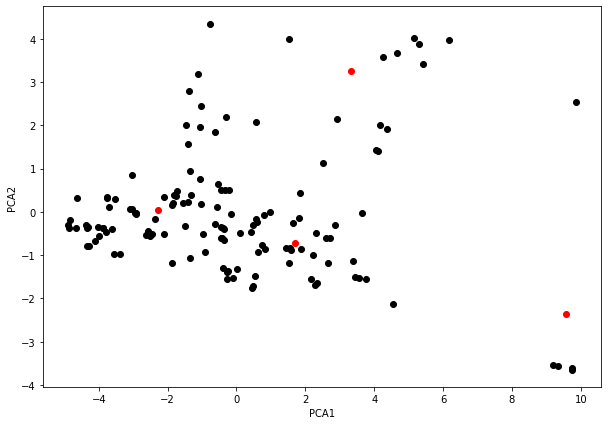

In [ ]:
K=4

# Select random observation as centroids
Centroids = np.array([[1.706, -0.711],
                      [9.572, -2.361],
                      [-2.267, 0.048],
                      [3.327, 3.247]])
Centroids = pd.DataFrame(Centroids, columns=['PCA1','PCA2'])
plt.figure(figsize=(10,7))
plt.scatter(data["PCA1"],data["PCA2"],c='black')
plt.scatter(Centroids["PCA1"],Centroids["PCA2"],c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [ ]:
Centroids = np.array(Centroids)
Centroids

array([[ 1.706, -0.711],
       [ 9.572, -2.361],
       [-2.267,  0.048],
       [ 3.327,  3.247]])

In [ ]:
dist = np.linalg.norm(data - Centroids[0,:],axis=1).reshape(-1,1)
dist[:10,:]

array([[7.99935344],
       [2.05242898],
       [3.1999839 ],
       [3.18353694],
       [5.55339156],
       [0.22808983],
       [2.89260441],
       [3.6255061 ],
       [1.29144004],
       [3.48092899]])

In [ ]:
dist = np.append(dist,np.linalg.norm(data - Centroids[1,:],axis=1).reshape(-1,1),axis=1)
dist[:10,:]

array([[ 7.99935344,  1.23506047],
       [ 2.05242898,  6.37544351],
       [ 3.1999839 ,  6.65208074],
       [ 3.18353694,  6.69583235],
       [ 5.55339156,  7.12843507],
       [ 0.22808983,  7.83434372],
       [ 2.89260441, 10.91716827],
       [ 3.6255061 , 11.65123107],
       [ 1.29144004,  9.3207102 ],
       [ 3.48092899, 11.4157418 ]])

In [ ]:
dist = np.append(dist,np.linalg.norm(data - Centroids[2,:],axis=1).reshape(-1,1),axis=1)
dist[:10,:]

array([[ 7.99935344,  1.23506047, 12.00444599],
       [ 2.05242898,  6.37544351,  5.90761892],
       [ 3.1999839 ,  6.65208074,  6.50890481],
       [ 3.18353694,  6.69583235,  6.47423789],
       [ 5.55339156,  7.12843507,  8.38775698],
       [ 0.22808983,  7.83434372,  4.24782663],
       [ 2.89260441, 10.91716827,  1.23129942],
       [ 3.6255061 , 11.65123107,  0.60467516],
       [ 1.29144004,  9.3207102 ,  2.77122583],
       [ 3.48092899, 11.4157418 ,  1.28425534]])

In [ ]:
dist = np.append(dist,np.linalg.norm(data - Centroids[3,:],axis=1).reshape(-1,1),axis=1)
dist[:10,:]

array([[ 7.99935344,  1.23506047, 12.00444599,  8.96541195],
       [ 2.05242898,  6.37544351,  5.90761892,  3.2863483 ],
       [ 3.1999839 ,  6.65208074,  6.50890481,  1.98576872],
       [ 3.18353694,  6.69583235,  6.47423789,  1.95263797],
       [ 5.55339156,  7.12843507,  8.38775698,  2.09098778],
       [ 0.22808983,  7.83434372,  4.24782663,  4.3470311 ],
       [ 2.89260441, 10.91716827,  1.23129942,  5.33518495],
       [ 3.6255061 , 11.65123107,  0.60467516,  5.83998285],
       [ 1.29144004,  9.3207102 ,  2.77122583,  4.54444783],
       [ 3.48092899, 11.4157418 ,  1.28425534,  5.2132294 ]])

In [ ]:
dist[134]

array([ 6.37695673, 14.37146247,  2.4335213 ,  8.77456433])

In [ ]:
classes = np.argmin(dist,axis=1)
classes

array([1, 0, 3, 3, 3, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 1, 0, 0, 3, 2, 3, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 3, 2, 2, 2, 0, 2, 2, 2, 2, 1, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0,
       0, 2, 0, 0, 3, 2, 3, 2, 0, 2, 0, 2, 2, 2, 2, 1, 0, 0, 3, 3, 0, 2,
       2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 3, 2, 0, 2, 2, 2, 2, 1, 0,
       0, 3, 3, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 3, 2, 0, 2,
       2, 2, 2])

In [ ]:
data['cluster'] = classes
data

,PCA1,PCA2,cluster
0,9.190095,-3.535531,1
1,3.640175,-0.024392,0
2,4.096444,1.416363,3
3,4.056736,1.435846,3
4,5.410273,3.426453,3
...,...,...,...
130,2.298692,-0.482691,0
131,-0.436206,-0.607883,2
132,-3.539341,0.305011,2
133,-3.035940,0.064091,2


In [ ]:
print(data[data['cluster']==0])
print(data[data['cluster']==1])

         PCA1      PCA2  cluster
1    3.640175 -0.024392        0
2    4.096444  1.416363        0
3    4.056736  1.435846        0
5    1.884051 -0.853558        0
8    0.482637 -0.297236        0
11   0.816371 -0.860951        0
14  -0.270204 -1.559812        0
15   2.643937 -1.181325        0
20   1.832158  0.426826        0
22   0.625263 -0.928961        0
28   1.443296 -0.825720        0
29   2.160953 -1.559306        0
33   0.578749 -0.158155        0
37   0.598154 -0.224839        0
38   0.023583 -1.330662        0
41   0.534577 -1.491561        0
42   3.444812 -1.500355        0
49   2.598792 -0.605551        0
55   1.812524 -0.137601        0
56   1.531626 -1.190660        0
57   4.542069 -2.140607        0
58   2.520605  1.122921        0
62  -0.283522 -1.392323        0
65   0.408560 -0.464905        0
68   0.095344 -0.493796        0
69   3.374868 -1.133430        0
74   2.866466 -0.312186        0
76   2.236436 -0.988513        0
82   1.584236 -0.893068        0
83   2.269

In [ ]:
print(data[data['cluster']==2])

         PCA1      PCA2  cluster
6   -1.043600  0.187253        2
7   -1.754795  0.369368        2
9   -1.352988  0.950161        2
10  -1.403592  1.559194        2
12  -0.455883 -0.360481        2
..        ...       ...      ...
129 -3.628878 -0.397641        2
131 -0.436206 -0.607883        2
132 -3.539341  0.305011        2
133 -3.035940  0.064091        2
134 -4.662412 -0.380986        2

[73 rows x 3 columns]


In [ ]:
print(data[data['cluster']==3])

         PCA1      PCA2  cluster
4    5.410273  3.426453        3
30   5.165132  4.021616        3
32   4.381375  1.917651        3
45   4.648754  3.672042        3
61  -1.131781  3.192050        3
70   0.558162  2.070096        3
72  -0.770635  4.349665        3
84   5.301112  3.872463        3
85   2.918049  2.150888        3
101  1.530591  4.000126        3
111  6.178141  3.963082        3
112  4.153538  2.009006        3
128  4.244063  3.577312        3


In [ ]:
unique, counts = np.unique(classes, return_counts=True)

print(np.asarray((unique, counts)).T)

[[ 0 44]
 [ 1  5]
 [ 2 72]
 [ 3 14]]


In [ ]:
#calculate the means of each clusters
#data_0 = data[data['cluster']==0]
#data_1 = data[data['cluster']==1]
#data_2 = data[data['cluster']==2]
data_3 = data[data['cluster']==3]
print(data_3)
print(data_3.mean())

         PCA1      PCA2  cluster
4    5.410273  3.426453        3
30   5.165132  4.021616        3
32   4.381375  1.917651        3
45   4.648754  3.672042        3
61  -1.131781  3.192050        3
70   0.558162  2.070096        3
72  -0.770635  4.349665        3
84   5.301112  3.872463        3
85   2.918049  2.150888        3
101  1.530591  4.000126        3
111  6.178141  3.963082        3
112  4.153538  2.009006        3
128  4.244063  3.577312        3
PCA1       3.275906
PCA2       3.247881
cluster    3.000000
dtype: float64


## Characteristics of each clusters (0,3,2,1)

In [ ]:
data_k4.head()

,PCA1,PCA2,clusters
0,9.190095,-3.535531,3
1,3.640175,-0.024392,2
2,4.096444,1.416363,0
3,4.056736,1.435846,0
4,5.410273,3.426453,0


In [ ]:
dff = pd.read_excel("jabarData_fix.xlsx")

In [ ]:
df_k4 = dff.copy()
df_k4['cluster'] = data_k4['clusters']
df_k4.head()

,kode_kabupaten_kota,nama_kabupaten_kota,tahun_ajaran,jumlah_sekolah_sd,jumlah_sekolah_smp,jumlah_sekolah_sma,jumlah_sekolah_smk,jumlah_sekolah_slb,jumlah_murid_sd,jumlah_murid_smp,jumlah_murid_sma,jumlah_murid_smk,jumlah_murid_slb,jumlah_guru_sd,jumlah_guru_smp,jumlah_guru_sma,jumlah_guru_smk,jumlah_guru_slb,cluster
0,3201,KABUPATEN BOGOR,2015/2016,1795,648,173,352,6,510841,202865,61153,113581,530,20491,8372,2950,4235,64,3
1,3202,KABUPATEN SUKABUMI,2015/2016,1209,324,77,155,11,231697,110222,59843,59507,1961,13490,5169,2353,2588,92,2
2,3203,KABUPATEN CIANJUR,2015/2016,1256,289,86,175,8,286310,104226,36226,45234,1625,10688,5398,3832,3592,528,1
3,3204,KABUPATEN BANDUNG,2015/2016,1415,304,107,137,43,304777,115259,46428,57456,599,14190,5462,2100,2639,394,1
4,3205,KABUPATEN GARUT,2015/2016,1586,364,120,171,33,370266,138763,47270,51498,2426,15396,5517,2208,2310,596,1


In [ ]:
df_grouped = df_k4.copy()
df_grouped['jumlah_sekolah'] = df_grouped['jumlah_sekolah_sd'] + df_grouped['jumlah_sekolah_smp'] + df_grouped['jumlah_sekolah_sma'] + df_grouped['jumlah_sekolah_smk'] + df_grouped['jumlah_sekolah_slb']
df_grouped['jumlah_murid'] = df_grouped['jumlah_murid_sd'] + df_grouped['jumlah_murid_smp'] + df_grouped['jumlah_murid_sma'] + df_grouped['jumlah_murid_smk'] + df_grouped['jumlah_murid_slb']
df_grouped['jumlah_guru'] = df_grouped['jumlah_guru_sd'] + df_grouped['jumlah_guru_smp'] + df_grouped['jumlah_guru_sma'] + df_grouped['jumlah_guru_smk'] + df_grouped['jumlah_guru_slb']
df_grouped = df_grouped[['jumlah_sekolah','jumlah_murid','jumlah_guru','cluster']]

df_grouped.head()

,jumlah_sekolah,jumlah_murid,jumlah_guru,cluster
0,2974,888970,36112,3
1,1776,463230,23692,2
2,1814,473621,24038,1
3,2006,524519,24785,1
4,2274,610223,26027,1


In [ ]:
df_grouped.groupby('cluster').mean()

,jumlah_sekolah,jumlah_murid,jumlah_guru
cluster,,,
0,553.450000,142604.400000,7991.133333
1,1908.615385,542778.615385,21982.846154
2,1353.948276,362148.051724,16825.879310
3,3047.750000,916548.750000,34506.750000


In [ ]:
#df = pd.read_excel('jabarData_fix.xlsx')
df['cluster'] = data['clusters']
df.head()

,jumlah_sekolah,jumlah_murid,jumlah_guru,cluster
0,2974,888970,36112,1
1,1776,463230,23692,3
2,1814,473621,24038,3
3,2006,524519,24785,3
4,2274,610223,26027,3


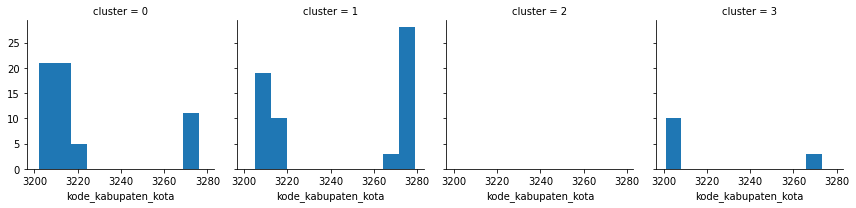

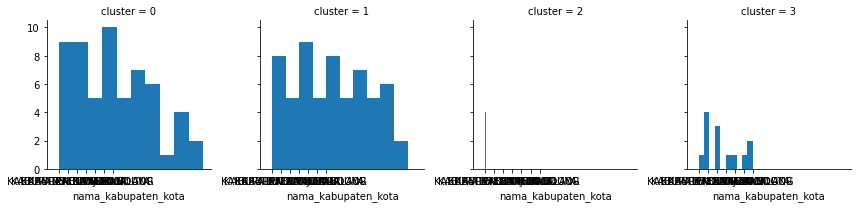

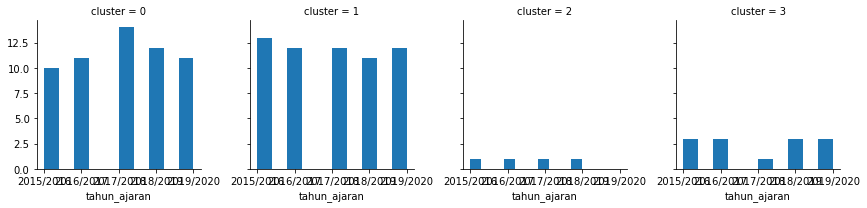

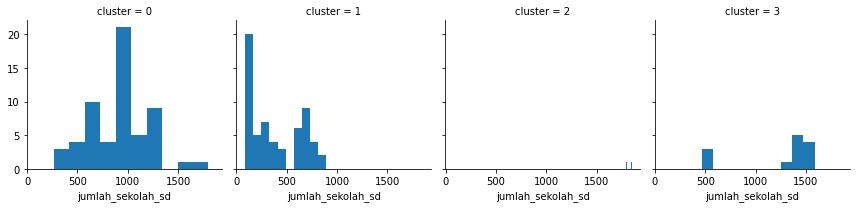

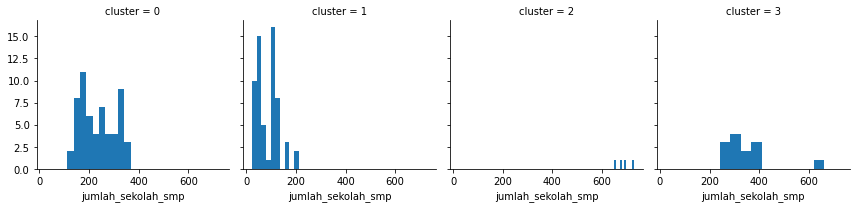

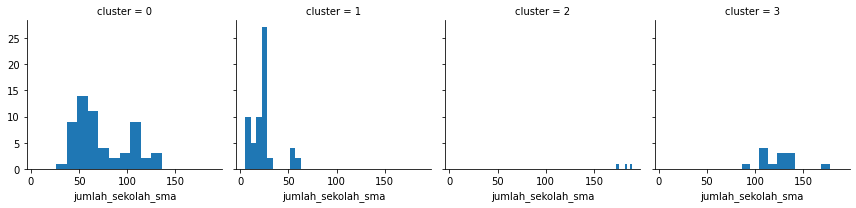

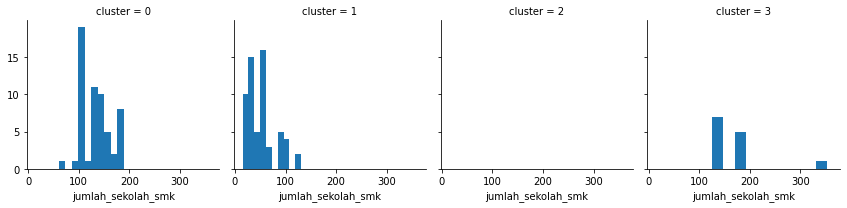

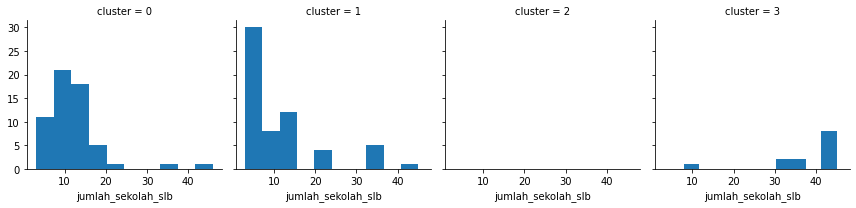

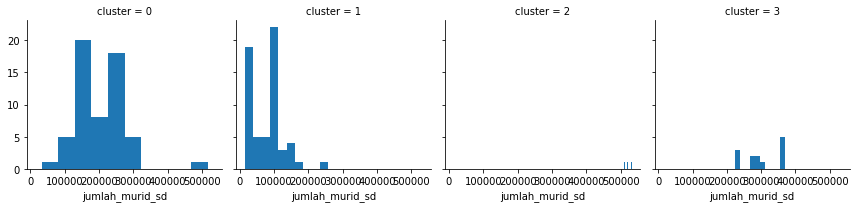

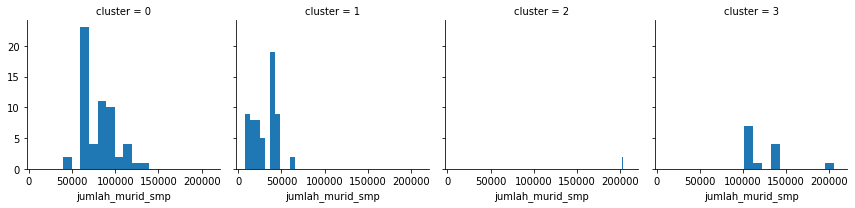

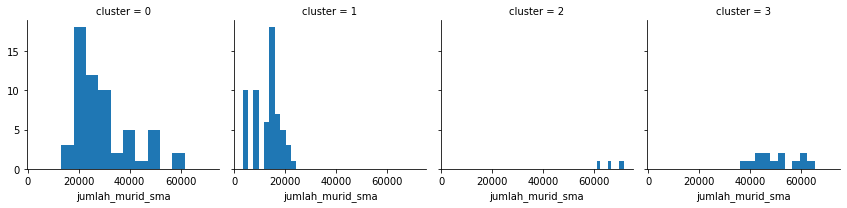

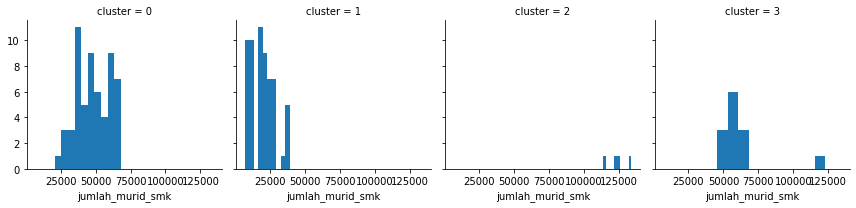

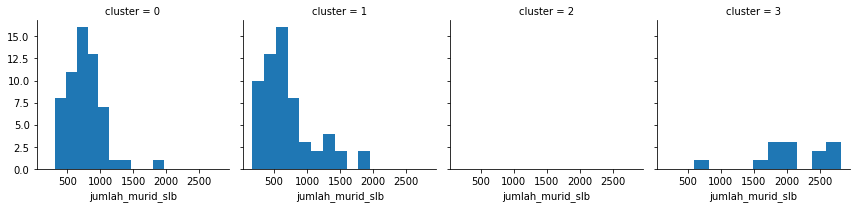

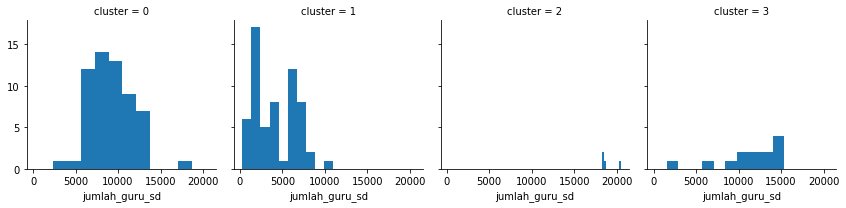

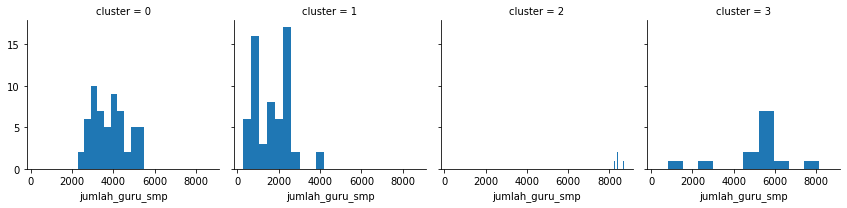

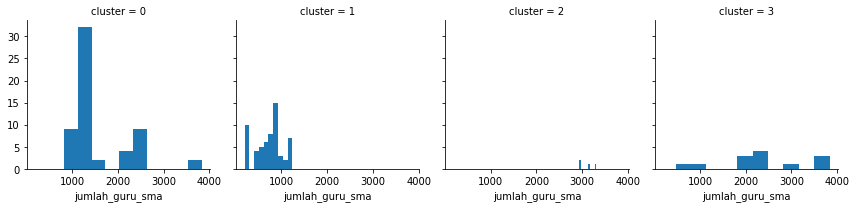

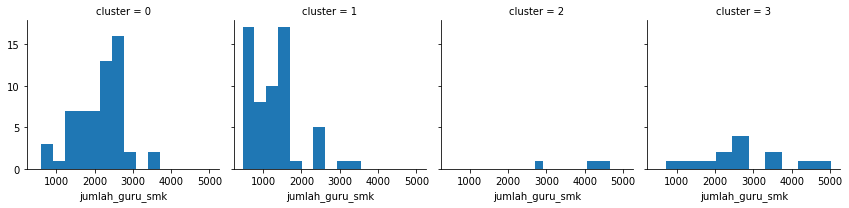

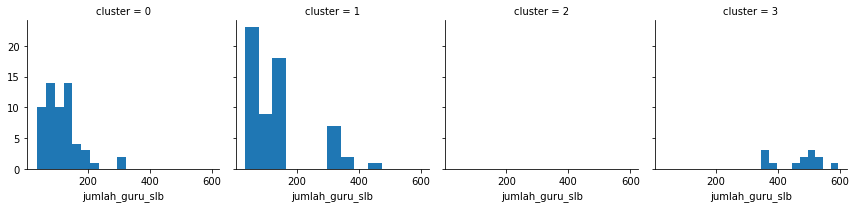

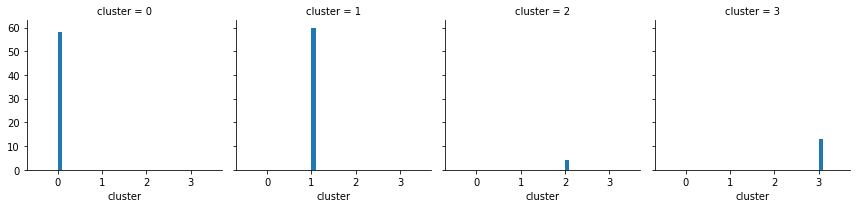

In [ ]:
# Interpretasi klaster yang terbentuk
for c in df:
    grid= sns.FacetGrid(df, col='cluster')
    grid.map(plt.hist, c)

In [ ]:
df_grouped = df.drop(['kode_kabupaten_kota','tahun_ajaran'], axis=1)
df_grouped['jumlah_sekolah'] = df_grouped['jumlah_sekolah_sd'] + df_grouped['jumlah_sekolah_smp'] + df_grouped['jumlah_sekolah_sma'] + df_grouped['jumlah_sekolah_smk'] + df_grouped['jumlah_sekolah_slb']
df_grouped['jumlah_murid'] = df_grouped['jumlah_murid_sd'] + df_grouped['jumlah_murid_smp'] + df_grouped['jumlah_murid_sma'] + df_grouped['jumlah_murid_smk'] + df_grouped['jumlah_murid_slb']
df_grouped['jumlah_guru'] = df_grouped['jumlah_guru_sd'] + df_grouped['jumlah_guru_smp'] + df_grouped['jumlah_guru_sma'] + df_grouped['jumlah_guru_smk'] + df_grouped['jumlah_guru_slb']
df_grouped = df_grouped[['nama_kabupaten_kota','jumlah_sekolah','jumlah_murid','jumlah_guru','cluster']]

df_grouped.head()

,nama_kabupaten_kota,jumlah_sekolah,jumlah_murid,jumlah_guru,cluster
0,KABUPATEN BOGOR,2974,888970,36112,2
1,KABUPATEN SUKABUMI,1776,463230,23692,0
2,KABUPATEN CIANJUR,1814,473621,24038,3
3,KABUPATEN BANDUNG,2006,524519,24785,3
4,KABUPATEN GARUT,2274,610223,26027,3


In [ ]:
#df_grouped.groupby(['cluster']).mean()
df.groupby(['cluster']).mean()

,jumlah_sekolah,jumlah_murid,jumlah_guru
cluster,,,
0,1054.245614,266840.070175,13353.035088
1,2866.666667,865706.333333,32749.833333
2,361.526316,107263.342105,5688.157895
3,1697.323529,464795.264706,20747.088235


## Restore the original data with its cluster

In [ ]:
df = pd.read_excel('jabarData_fix.xlsx')
df['cluster'] = data['clusters']
df.head()

,kode_kabupaten_kota,nama_kabupaten_kota,tahun_ajaran,jumlah_sekolah_sd,jumlah_sekolah_smp,jumlah_sekolah_sma,jumlah_sekolah_smk,jumlah_sekolah_slb,jumlah_murid_sd,jumlah_murid_smp,jumlah_murid_sma,jumlah_murid_smk,jumlah_murid_slb,jumlah_guru_sd,jumlah_guru_smp,jumlah_guru_sma,jumlah_guru_smk,jumlah_guru_slb,cluster
0,3201,KABUPATEN BOGOR,2015/2016,1795,648,173,352,6,510841,202865,61153,113581,530,20491,8372,2950,4235,64,3
1,3202,KABUPATEN SUKABUMI,2015/2016,1209,324,77,155,11,231697,110222,59843,59507,1961,13490,5169,2353,2588,92,2
2,3203,KABUPATEN CIANJUR,2015/2016,1256,289,86,175,8,286310,104226,36226,45234,1625,10688,5398,3832,3592,528,1
3,3204,KABUPATEN BANDUNG,2015/2016,1415,304,107,137,43,304777,115259,46428,57456,599,14190,5462,2100,2639,394,1
4,3205,KABUPATEN GARUT,2015/2016,1586,364,120,171,33,370266,138763,47270,51498,2426,15396,5517,2208,2310,596,1


### Cluster 0

In [ ]:
df[df['cluster']==0]

,kode_kabupaten_kota,nama_kabupaten_kota,tahun_ajaran,jumlah_sekolah_sd,jumlah_sekolah_smp,jumlah_sekolah_sma,jumlah_sekolah_smk,jumlah_sekolah_slb,jumlah_murid_sd,jumlah_murid_smp,jumlah_murid_sma,jumlah_murid_smk,jumlah_murid_slb,jumlah_guru_sd,jumlah_guru_smp,jumlah_guru_sma,jumlah_guru_smk,jumlah_guru_slb,cluster
6,3207,KABUPATEN CIAMIS,2015/2016,743,110,26,61,22,142765,62051,20259,33354,711,6913,2937,1092,1598,86,0
7,3208,KABUPATEN KUNINGAN,2015/2016,651,99,28,47,14,103195,41070,16997,24984,819,6721,2311,941,1480,149,0
9,3210,KABUPATEN MAJALENGKA,2015/2016,667,104,22,56,13,106532,45466,20004,37941,645,6746,2484,864,1500,354,0
10,3211,KABUPATEN SUMEDANG,2015/2016,599,106,25,86,34,104121,44878,14632,23106,1134,6936,2411,778,1372,152,0
13,3214,KABUPATEN PURWAKARTA,2015/2016,403,171,25,58,6,99447,39436,14114,19320,456,4553,2156,1238,1719,113,0
17,3218,KABUPATEN PANGANDARAN,2015/2016,284,52,6,30,6,51501,22358,9138,18120,568,2193,1031,574,806,148,0
18,3271,KOTA BOGOR,2015/2016,262,120,52,102,10,95375,39503,12947,19543,1302,4916,1838,618,980,79,0
19,3272,KOTA SUKABUMI,2015/2016,121,44,17,32,3,33038,16240,8248,11465,181,1862,1060,758,742,69,0
21,3274,KOTA CIREBON,2015/2016,161,43,24,30,5,36292,19884,12925,11219,383,2698,931,226,591,74,0
23,3276,KOTA DEPOK,2015/2016,445,208,62,131,13,113511,38998,14282,24978,680,7002,2363,838,1239,340,0


### Cluster 1

In [ ]:
df[df['cluster']==1]

,kode_kabupaten_kota,nama_kabupaten_kota,tahun_ajaran,jumlah_sekolah_sd,jumlah_sekolah_smp,jumlah_sekolah_sma,jumlah_sekolah_smk,jumlah_sekolah_slb,jumlah_murid_sd,jumlah_murid_smp,jumlah_murid_sma,jumlah_murid_smk,jumlah_murid_slb,jumlah_guru_sd,jumlah_guru_smp,jumlah_guru_sma,jumlah_guru_smk,jumlah_guru_slb,cluster
2,3203,KABUPATEN CIANJUR,2015/2016,1256,289,86,175,8,286310,104226,36226,45234,1625,10688,5398,3832,3592,528,1
3,3204,KABUPATEN BANDUNG,2015/2016,1415,304,107,137,43,304777,115259,46428,57456,599,14190,5462,2100,2639,394,1
4,3205,KABUPATEN GARUT,2015/2016,1586,364,120,171,33,370266,138763,47270,51498,2426,15396,5517,2208,2310,596,1
30,3204,KABUPATEN BANDUNG,2016/2017,1419,318,107,137,43,369563,137706,50712,55435,2717,14012,5547,2226,2393,527,1
32,3206,KABUPATEN TASIKMALAYA,2016/2017,1579,382,124,175,33,282933,105079,42540,50451,1846,12277,5163,2096,2802,351,1
45,3271,KOTA BOGOR,2016/2017,466,241,132,126,45,230636,108001,61965,62352,2104,10148,5243,3835,3606,490,1
54,3201,KABUPATEN BOGOR,2017/2018,1411,662,178,353,45,369173,205524,65388,123024,2599,14000,8136,2930,4172,515,1
84,3204,KABUPATEN BANDUNG,2018/2019,1406,322,108,139,45,366582,135700,53167,58199,2565,14044,5779,2305,2532,512,1
85,3205,KABUPATEN GARUT,2018/2019,1584,381,124,179,34,277816,103971,44737,53698,1768,6164,2448,873,1643,348,1
101,3273,KOTA BANDUNG,2018/2019,471,246,138,125,45,225848,102933,60866,64971,1966,1537,809,465,721,485,1


### Cluster 2

In [ ]:
df[df['cluster']==2]

,kode_kabupaten_kota,nama_kabupaten_kota,tahun_ajaran,jumlah_sekolah_sd,jumlah_sekolah_smp,jumlah_sekolah_sma,jumlah_sekolah_smk,jumlah_sekolah_slb,jumlah_murid_sd,jumlah_murid_smp,jumlah_murid_sma,jumlah_murid_smk,jumlah_murid_slb,jumlah_guru_sd,jumlah_guru_smp,jumlah_guru_sma,jumlah_guru_smk,jumlah_guru_slb,cluster
1,3202,KABUPATEN SUKABUMI,2015/2016,1209,324,77,155,11,231697,110222,59843,59507,1961,13490,5169,2353,2588,92,2
5,3206,KABUPATEN TASIKMALAYA,2015/2016,1086,251,65,133,13,244251,97139,25189,46921,522,11475,4403,2413,2707,150,2
8,3209,KABUPATEN CIREBON,2015/2016,923,184,45,107,14,201754,78071,21728,48439,800,9537,3987,1117,2179,146,2
11,3212,KABUPATEN INDRAMAYU,2015/2016,894,203,56,140,5,235032,88806,26205,38482,754,9629,4133,1159,2387,145,2
12,3213,KABUPATEN SUBANG,2015/2016,876,156,44,104,10,163872,64411,15655,34178,795,8489,3166,1058,1852,126,2
14,3215,KABUPATEN KARAWANG,2015/2016,897,152,48,108,3,159506,62883,18537,45080,353,8368,3432,1210,2507,50,2
15,3216,KABUPATEN BEKASI,2015/2016,951,322,106,180,11,254504,94614,40886,64778,883,12939,4271,1297,2668,78,2
16,3217,KABUPATEN BANDUNG BARAT,2015/2016,700,160,54,96,18,157541,61414,22221,26631,899,7566,2822,1154,1334,214,2
20,3273,KOTA BANDUNG,2015/2016,819,239,135,126,46,226340,88576,32287,56133,313,10522,3934,1334,1833,111,2
22,3275,KOTA BEKASI,2015/2016,707,263,111,149,14,167103,64644,22955,36956,667,9869,3181,1248,2154,38,2


### Cluster 3

In [ ]:
df[df['cluster']==3]

,kode_kabupaten_kota,nama_kabupaten_kota,tahun_ajaran,jumlah_sekolah_sd,jumlah_sekolah_smp,jumlah_sekolah_sma,jumlah_sekolah_smk,jumlah_sekolah_slb,jumlah_murid_sd,jumlah_murid_smp,jumlah_murid_sma,jumlah_murid_smk,jumlah_murid_slb,jumlah_guru_sd,jumlah_guru_smp,jumlah_guru_sma,jumlah_guru_smk,jumlah_guru_slb,cluster
0,3201,KABUPATEN BOGOR,2015/2016,1795,648,173,352,6,510841,202865,61153,113581,530,20491,8372,2950,4235,64,3
27,3201,KABUPATEN BOGOR,2016/2017,1815,673,176,356,6,515245,202606,66121,121766,567,18579,8216,2933,4293,58,3
81,3201,KABUPATEN BOGOR,2018/2019,1823,690,183,358,6,520803,204872,69802,125748,549,18320,8374,3125,4646,57,3
108,3201,KABUPATEN BOGOR,2019/2020,1846,729,189,361,6,532036,210751,71831,133945,583,18501,8723,3314,2712,64,3


## Naive Bayes Classification of 4 clusters

In [ ]:
df_k4.head()

,jumlah_sekolah_sd,jumlah_sekolah_smp,jumlah_sekolah_sma,jumlah_sekolah_smk,jumlah_sekolah_slb,jumlah_murid_sd,jumlah_murid_smp,jumlah_murid_sma,jumlah_murid_smk,jumlah_murid_slb,jumlah_guru_sd,jumlah_guru_smp,jumlah_guru_sma,jumlah_guru_smk,jumlah_guru_slb,cluster
0,1795,648,173,352,6,510841,202865,61153,113581,530,20491,8372,2950,4235,64,2
1,1209,324,77,155,11,231697,110222,59843,59507,1961,13490,5169,2353,2588,92,1
2,1256,289,86,175,8,286310,104226,36226,45234,1625,10688,5398,3832,3592,528,3
3,1415,304,107,137,43,304777,115259,46428,57456,599,14190,5462,2100,2639,394,3
4,1586,364,120,171,33,370266,138763,47270,51498,2426,15396,5517,2208,2310,596,3


In [ ]:
df = df_k4.copy()

### Standardizing data

In [ ]:
df.drop(['kode_kabupaten_kota','nama_kabupaten_kota','tahun_ajaran'], axis=1, inplace=True)

KeyError: ignored

In [ ]:
df = df_k4

In [ ]:
df_scaled = df.drop('cluster', axis=1)
scaler = StandardScaler()
scaler.fit(df_scaled)
scaled_features = scaler.transform(df_scaled)
df_scaled = pd.DataFrame(scaled_features,columns = df_scaled.columns)
df_scaled.head()

,jumlah_sekolah_sd,jumlah_sekolah_smp,jumlah_sekolah_sma,jumlah_sekolah_smk,jumlah_sekolah_slb,jumlah_murid_sd,jumlah_murid_smp,jumlah_murid_sma,jumlah_murid_smk,jumlah_murid_slb,jumlah_guru_sd,jumlah_guru_smp,jumlah_guru_sma,jumlah_guru_smk,jumlah_guru_slb
0,2.345096,3.261904,2.597434,3.499660,-0.699109,3.020501,3.143158,2.196097,3.064478,-0.597463,3.036825,2.913933,1.974548,2.525110,-0.704436
1,1.056642,0.940313,0.402992,0.684456,-0.267363,0.568525,1.014200,2.116059,0.834614,2.033752,1.405713,1.131539,1.258684,0.767990,-0.490731
2,1.159983,0.689524,0.608721,0.970264,-0.526411,1.048241,0.876411,0.673103,0.246034,1.415940,0.752895,1.258972,3.032156,1.839119,2.836966
3,1.509580,0.797005,1.088755,0.427229,2.495814,1.210454,1.129952,1.296426,0.750036,-0.470591,1.568801,1.294587,0.955311,0.822400,1.814233
4,1.885562,1.226930,1.385919,0.913102,1.632321,1.785703,1.670079,1.347871,0.504344,2.888758,1.849778,1.325193,1.084814,0.471403,3.355964


### Defining X and y

In [ ]:
X = df_scaled
y = df['cluster']

### Scenario: 70:30 (Acc:97%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)

print(np.asarray((unique, counts)).T)

[[ 0 43]
 [ 1 40]
 [ 2  4]
 [ 3  7]]


In [ ]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
classifier.predict([X_test.loc[8]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


array([1], dtype=int32)

In [ ]:
y_pred  =  classifier.predict(X_test)

In [ ]:
classifier.class_prior_

array([0.45744681, 0.42553191, 0.07446809, 0.04255319])

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

print(ac)
print(cm)

0.975609756097561
[[18  0  0  0]
 [ 0 18  0  0]
 [ 0  0  3  0]
 [ 0  0  1  1]]


https://github.com/tigju/Naive-Bayes-Classifier-from-scratch/blob/main/naive_bayes.ipynb

### Manual calculation

In [ ]:
class NaiveBayesClassifier():
    '''
    Bayes Theorem form
    P(y|X) = P(X|y) * P(y) / P(X)
    '''
    def calc_prior(self, features, target):
        '''
        prior probability P(y)
        calculate prior probabilities
        '''
        self.prior = (features.groupby(target).apply(lambda x: len(x)) / self.rows).to_numpy()

        return self.prior
    
    def calc_statistics(self, features, target):
        '''
        calculate mean, variance for each column and convert to numpy array
        ''' 
        self.mean = features.groupby(target).apply(np.mean).to_numpy()
        self.var = features.groupby(target).apply(np.var).to_numpy()
              
        return self.mean, self.var
    
    def gaussian_density(self, class_idx, x):     
        '''
        calculate probability from gaussian density function (normally distributed)
        we will assume that probability of specific target value given specific class is normally distributed 
        
        probability density function derived from wikipedia:
        (1/√2pi*σ) * exp((-1/2)*((x-μ)^2)/(2*σ²)), where μ is mean, σ² is variance, σ is quare root of variance (standard deviation)
        '''
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp((-1/2)*((x-mean)**2) / (2 * var))
#         numerator = np.exp(-((x-mean)**2 / (2 * var)))
        denominator = np.sqrt(2 * np.pi * var)
        prob = numerator / denominator
        return prob
    
    def calc_posterior(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for i in range(self.count):
            prior = self.prior[i] ## use the log to make it more numerically stable
            conditional = np.prod(self.gaussian_density(i, x)) # use the log to make it more numerically stable
            posterior = prior * conditional
            posteriors.append(posterior)
        # return class with highest posterior probability
        return self.classes[np.argmax(posteriors)]
           
           
    def posterior(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for i in range(self.count):
            prior = self.prior[i] ## use the log to make it more numerically stable
            conditional = np.prod(self.gaussian_density(i, x)) # use the log to make it more numerically stable
            posterior = prior * conditional
            posteriors.append(posterior)
        # return class with highest posterior probability
        return posteriors
     

    def fit(self, features, target):
        self.classes = np.unique(target)
        self.count = len(self.classes)
        self.feature_nums = features.shape[1]
        self.rows = features.shape[0]
        
        self.calc_statistics(features, target)
        self.calc_prior(features, target)
        
    def predict(self, features):
        preds = [self.calc_posterior(f) for f in features.to_numpy()]
        return preds

    def accuracy(self, y_test, y_pred):
        accuracy = np.sum(y_test == y_pred) / len(y_test)
        return accuracy

    def visualize(self, y_true, y_pred, target):
        
        tr = pd.DataFrame(data=y_true, columns=[target])
        pr = pd.DataFrame(data=y_pred, columns=[target])
        
        
        fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15,6))
        
        sns.countplot(x=target, data=tr, ax=ax[0], palette='viridis', alpha=0.7, hue=target, dodge=False)
        sns.countplot(x=target, data=pr, ax=ax[1], palette='viridis', alpha=0.7, hue=target, dodge=False)
        

        fig.suptitle('True vs Predicted Comparison', fontsize=20)

        ax[0].tick_params(labelsize=12)
        ax[1].tick_params(labelsize=12)
        ax[0].set_title("True values", fontsize=18)
        ax[1].set_title("Predicted values", fontsize=18)
        plt.show()

In [ ]:
x = NaiveBayesClassifier()

In [ ]:
x.calc_posterior(X_test.loc[8])

1

In [ ]:
x.posterior(X_test.loc[8])

[8.553396968308234e-09, 0.0003814829123078312, 0.0, 1.1221031819800574e-18]

In [ ]:
x.fit(X_train, y_train)

In [ ]:
df['cluster'].loc[88]

0

In [ ]:
x.calc_posterior(X_test.loc[88])

0

In [ ]:
x.calc_statistics(X_train, y_train)

(array([[-0.78834412, -0.75855404, -0.79310704, -0.76319221, -0.22720046,
         -0.76975492, -0.80393297, -0.74593723, -0.76680884, -0.29356015,
         -0.76403411, -0.81333306, -0.72050352, -0.66180262, -0.11958633],
        [ 0.48442407,  0.3751421 ,  0.39441974,  0.42508574, -0.18317238,
          0.45166266,  0.4179105 ,  0.36955298,  0.43117908, -0.1026621 ,
          0.5347358 ,  0.50267911,  0.43858821,  0.37199773, -0.30488335],
        [ 1.02114873,  0.88094288,  1.40224691,  0.53746933,  2.34778627,
          1.22538367,  1.23338231,  1.63150643,  0.78210085,  2.17874805,
          0.95083055,  0.93613651,  1.04558649,  0.85532018,  2.42481977],
        [ 2.3995142 ,  3.5270244 ,  2.76316056,  3.56753928, -0.69910924,
          3.09859247,  3.19850639,  2.56719264,  3.48423167, -0.54735754,
          2.68309906,  2.94133984,  2.13103074,  2.24399252, -0.72924094]]),
 array([[2.62943012e-01, 1.14809716e-01, 1.00342074e-01, 1.78745296e-01,
         6.88171772e-01, 1.777007

In [ ]:
x.prior

array([0.44680851, 0.42553191, 0.0212766 , 0.10638298])

In [ ]:
X_a = X_train.copy()
X_a['cluster'] = y_train
X_a = X_a[X_a['cluster']==0]
print(X_a['jumlah_sekolah_smp'].mean())
print(X_a['jumlah_sekolah_smp'].var())


-0.7585540367393876
0.11754328083003603


In [ ]:
x.gaussian_density(1, X_test.loc[8])

jumlah_sekolah_sd     0.681775
jumlah_sekolah_smp    0.662628
jumlah_sekolah_sma    0.476419
jumlah_sekolah_smk    0.734199
jumlah_sekolah_slb    0.769980
jumlah_murid_sd       0.641707
jumlah_murid_smp      0.853332
jumlah_murid_sma      0.508372
jumlah_murid_smk      0.815236
jumlah_murid_slb      0.731938
jumlah_guru_sd        0.663142
jumlah_guru_smp       0.847718
jumlah_guru_sma       0.564013
jumlah_guru_smk       0.685452
jumlah_guru_slb       0.773556
Name: 8, dtype: float64

In [ ]:
X_test.loc[8]

jumlah_sekolah_sd     0.427807
jumlah_sekolah_smp   -0.062843
jumlah_sekolah_sma   -0.328489
jumlah_sekolah_smk   -0.001482
jumlah_sekolah_slb   -0.008315
jumlah_murid_sd       0.305509
jumlah_murid_smp      0.275362
jumlah_murid_sma     -0.212699
jumlah_murid_smk      0.378199
jumlah_murid_slb     -0.101007
jumlah_guru_sd        0.484732
jumlah_guru_smp       0.473784
jumlah_guru_sma      -0.223406
jumlah_guru_smk       0.331644
jumlah_guru_slb      -0.078585
Name: 8, dtype: float64

In [ ]:
x.posterior(X_test.loc[8])

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[-18.57693732666808, -7.871444499048062, -41.331326908471546, -inf]

In [ ]:
x.predict(X_test.loc[8])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log


[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

In [ ]:
y_pred  

array([1, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 2, 0, 0, 2, 1, 2, 0, 0, 0, 1, 2, 0, 0, 0],
      dtype=int32)

In [ ]:
y_test

120    1
33     1
45     2
126    0
83     1
8      1
52     0
104    1
22     1
113    1
48     0
97     1
24     0
76     1
43     1
90     0
54     2
68     1
131    1
92     1
7      0
26     0
95     1
10     0
62     1
100    0
16     1
2      2
51     0
63     0
85     2
50     1
30     2
114    0
71     0
61     0
56     1
112    2
129    0
13     0
44     0
Name: cluster, dtype: int32

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

print(ac)
print(cm)

1.0
[[23  0  0  0]
 [ 0  1  0  0]
 [ 0  0  9  0]
 [ 0  0  0  8]]


In [ ]:
y_train_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
ac = accuracy_score(y_train,y_train_pred)
print(ac)
print(cm)

0.9893617021276596
[[34  0  0  0]
 [ 0  5  0  0]
 [ 1  0 28  0]
 [ 0  0  0 26]]


In [ ]:
val = [1795, 648, 173, 352, 6, 510841, 202865, 61153, 113581, 530, 20491, 8372, 2950, 4235, 64]	
val = scaler.transform([val])

classifier.predict(val)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


array([2], dtype=int32)

In [ ]:
df.tail()

,jumlah_sekolah_sd,jumlah_sekolah_smp,jumlah_sekolah_sma,jumlah_sekolah_smk,jumlah_sekolah_slb,jumlah_murid_sd,jumlah_murid_smp,jumlah_murid_sma,jumlah_murid_smk,jumlah_murid_slb,jumlah_guru_sd,jumlah_guru_smp,jumlah_guru_sma,jumlah_guru_smk,jumlah_guru_slb,cluster
130,713,287,111,147,12,250416,94772,42650,67073,1005,10823,4704,2404,822,148,0
131,454,234,66,131,13,168289,65724,24426,40210,657,6650,3208,1231,711,74,0
132,125,40,16,24,9,51053,20814,9215,19692,639,1983,932,514,1698,143,1
133,229,75,27,52,6,64854,28835,14730,20324,723,2972,1628,791,714,130,1
134,86,26,5,17,5,15766,8112,3378,8549,331,956,534,191,1257,56,1


In [ ]:
val = [90, 100, 50, 35, 6, 20000, 10000, 5000, 9000, 270, 1000, 430, 200, 2000, 60]	
val = scaler.transform([val])

classifier.predict(val)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


array([1], dtype=int32)

### Scenario: 75:25 (Acc: 91%)

In [ ]:
X = df_scaled
y = df['cluster']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred  =  classifier.predict(X_test)

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)

print(np.asarray((unique, counts)).T)

[[ 0 46]
 [ 1 42]
 [ 2 10]
 [ 3  3]]


In [ ]:
y_pred  

array([2, 2, 2, 2, 3, 0, 0, 3, 2, 3, 2, 2, 1, 2, 0, 0, 2, 3, 3, 1, 3, 2,
       0, 2, 0, 3, 3, 3, 3, 2, 0, 3, 0, 1], dtype=int32)

In [ ]:
y_test

98     2
67     2
105    2
19     2
42     3
62     0
12     0
110    3
125    2
128    3
44     2
40     2
27     1
100    2
119    0
31     0
51     2
4      3
84     3
81     1
85     3
26     2
16     0
18     2
10     0
111    3
45     3
11     3
123    3
80     2
104    0
83     3
36     0
0      1
Name: cluster, dtype: int32

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

print(ac)
print(cm)

0.9705882352941176
[[14  0  0  0]
 [ 0 16  0  0]
 [ 0  0  3  0]
 [ 0  0  1  0]]


In [ ]:
y_train_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
ac = accuracy_score(y_train,y_train_pred)
print(ac)
print(cm)

0.9801980198019802
[[49  0  0  0]
 [ 0  3  0  0]
 [ 2  0 24  0]
 [ 0  0  0 23]]


In [ ]:
val = [1795, 648, 173, 352, 6, 510841, 202865, 61153, 113581, 530, 20491, 8372, 2950, 4235, 64]	
val = scaler.transform([val])

classifier.predict(val)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


array([3], dtype=int32)

In [ ]:
df.tail()

,jumlah_sekolah_sd,jumlah_sekolah_smp,jumlah_sekolah_sma,jumlah_sekolah_smk,jumlah_sekolah_slb,jumlah_murid_sd,jumlah_murid_smp,jumlah_murid_sma,jumlah_murid_smk,jumlah_murid_slb,jumlah_guru_sd,jumlah_guru_smp,jumlah_guru_sma,jumlah_guru_smk,jumlah_guru_slb,cluster
130,713,287,111,147,12,250416,94772,42650,67073,1005,10823,4704,2404,822,148,0
131,454,234,66,131,13,168289,65724,24426,40210,657,6650,3208,1231,711,74,0
132,125,40,16,24,9,51053,20814,9215,19692,639,1983,932,514,1698,143,1
133,229,75,27,52,6,64854,28835,14730,20324,723,2972,1628,791,714,130,1
134,86,26,5,17,5,15766,8112,3378,8549,331,956,534,191,1257,56,1


In [ ]:
val = [90, 100, 50, 35, 6, 20000, 10000, 5000, 9000, 270, 1000, 430, 200, 2000, 60]	
val = scaler.transform([val])

classifier.predict(val)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


array([1], dtype=int32)

### Scenario: 80:20 (Acc: 96%)

In [ ]:
X = df_scaled
y = df['cluster']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred  =  classifier.predict(X_test)

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)

print(np.asarray((unique, counts)).T)

[[ 0 49]
 [ 1 46]
 [ 2 10]
 [ 3  3]]


In [ ]:
y_pred  

array([0, 0, 3, 0, 3, 0, 2, 0, 0, 0, 2, 0, 2, 3, 0, 0, 1, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 0], dtype=int32)

In [ ]:
y_test

120    0
33     0
45     3
126    1
83     0
8      0
52     1
104    0
22     0
113    0
48     1
97     0
24     1
76     0
43     0
90     1
54     3
68     0
131    0
92     0
7      1
26     1
95     0
10     1
62     0
100    1
16     0
Name: cluster, dtype: int32

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

print(ac)
print(cm)

0.9629629629629629
[[11  0  0  0]
 [ 0 12  0  0]
 [ 0  0  3  0]
 [ 0  0  1  0]]


In [ ]:
y_train_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
ac = accuracy_score(y_train,y_train_pred)
print(ac)
print(cm)

0.9814814814814815
[[38  0  0  1]
 [ 0  5  0  0]
 [ 1  0 32  0]
 [ 0  0  0 31]]


In [ ]:
val = [1795, 648, 173, 352, 6, 510841, 202865, 61153, 113581, 530, 20491, 8372, 2950, 4235, 64]	
val = scaler.transform([val])

classifier.predict(val)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


array([2], dtype=int32)

In [ ]:
df.tail()

,jumlah_sekolah_sd,jumlah_sekolah_smp,jumlah_sekolah_sma,jumlah_sekolah_smk,jumlah_sekolah_slb,jumlah_murid_sd,jumlah_murid_smp,jumlah_murid_sma,jumlah_murid_smk,jumlah_murid_slb,jumlah_guru_sd,jumlah_guru_smp,jumlah_guru_sma,jumlah_guru_smk,jumlah_guru_slb,cluster
130,713,287,111,147,12,250416,94772,42650,67073,1005,10823,4704,2404,822,148,0
131,454,234,66,131,13,168289,65724,24426,40210,657,6650,3208,1231,711,74,0
132,125,40,16,24,9,51053,20814,9215,19692,639,1983,932,514,1698,143,1
133,229,75,27,52,6,64854,28835,14730,20324,723,2972,1628,791,714,130,1
134,86,26,5,17,5,15766,8112,3378,8549,331,956,534,191,1257,56,1


In [ ]:
val = [90, 100, 50, 35, 6, 20000, 10000, 5000, 9000, 270, 1000, 430, 200, 2000, 60]	
val = scaler.transform([val])

classifier.predict(val)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


array([1], dtype=int32)

### Scenario: 90:10 (Acc:99-100%)

In [ ]:
X = df_scaled
y = df['cluster']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 123)

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred  =  classifier.predict(X_test)

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)

print(np.asarray((unique, counts)).T)

[[ 0 55]
 [ 1 52]
 [ 2 11]
 [ 3  3]]


In [ ]:
y_pred  

array([0, 0, 4, 4, 3, 0, 1, 1, 3, 3, 0, 0, 1, 4], dtype=int32)

In [ ]:
y_test

98     2
67     2
105    2
19     2
42     3
62     0
12     0
110    3
125    2
128    3
44     2
40     2
27     1
100    2
Name: cluster, dtype: int32

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

print(ac)
print(cm)

0.9285714285714286
[[5 0 0 0]
 [0 6 0 0]
 [0 0 2 0]
 [0 0 1 0]]


In [ ]:
y_train_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
ac = accuracy_score(y_train,y_train_pred)
print(ac)
print(cm)

0.9917355371900827
[[51  1  0  0]
 [ 0 54  0  0]
 [ 0  0 12  0]
 [ 0  0  0  3]]


In [ ]:
val = [1795, 648, 173, 352, 6, 510841, 202865, 61153, 113581, 530, 20491, 8372, 2950, 4235, 64]	
val = scaler.transform([val])

classifier.predict(val)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


array([1], dtype=int32)

In [ ]:
df.tail()

,jumlah_sekolah_sd,jumlah_sekolah_smp,jumlah_sekolah_sma,jumlah_sekolah_smk,jumlah_sekolah_slb,jumlah_murid_sd,jumlah_murid_smp,jumlah_murid_sma,jumlah_murid_smk,jumlah_murid_slb,jumlah_guru_sd,jumlah_guru_smp,jumlah_guru_sma,jumlah_guru_smk,jumlah_guru_slb,cluster
130,713,287,111,147,12,250416,94772,42650,67073,1005,10823,4704,2404,822,148,3
131,454,234,66,131,13,168289,65724,24426,40210,657,6650,3208,1231,711,74,3
132,125,40,16,24,9,51053,20814,9215,19692,639,1983,932,514,1698,143,0
133,229,75,27,52,6,64854,28835,14730,20324,723,2972,1628,791,714,130,0
134,86,26,5,17,5,15766,8112,3378,8549,331,956,534,191,1257,56,0


In [ ]:
val = [90, 100, 50, 35, 6, 20000, 10000, 5000, 9000, 270, 1000, 430, 200, 2000, 60]	
val = scaler.transform([val])

classifier.predict(val)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


array([0], dtype=int32)

In [ ]:
val = [90, 100, 50, 35, 6, 20000, 10000, 5000, 9000, 270, 1000, 430, 200, 2000, 60]	
val = scaler.transform([val])
val = pca_2.transform(val)

model.predict(val)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


array([0], dtype=int32)

In [ ]:
val = [1000, 300, 200, 300, 30, 300000, 100000, 50000, 70000, 5000, 10000, 5000, 1000, 1200, 60]	
val = scaler.transform([val])

classifier.predict(val)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


array([2], dtype=int32)

In [ ]:
val = [1000, 300, 200, 300, 30, 300000, 100000, 50000, 70000, 5000, 10000, 5000, 1000, 1200, 60]
val = scaler.transform([val])
val = pca_2.transform(val)

model.predict(val)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


array([2], dtype=int32)

# Clustering & Classification of 5 Clusters

## K-means clustering of 5 clusters

In [ ]:
data = pd.DataFrame(pca_2_result)
data = data.rename(columns={0:'PCA1',
                            1:'PCA2'})
data

,PCA1,PCA2
0,9.190095,-3.535531
1,3.640175,-0.024392
2,4.096444,1.416363
3,4.056736,1.435846
4,5.410273,3.426453
...,...,...
130,2.298692,-0.482691
131,-0.436206,-0.607883
132,-3.539341,0.305011
133,-3.035940,0.064091


In [ ]:
X = data

In [ ]:
model = KMeans(n_clusters = 5, init = "k-means++")

In [ ]:
y = model.fit_predict(X)

In [ ]:
model.cluster_centers_

array([[-0.78039344,  0.25653586],
       [ 4.76403147,  2.92299856],
       [-3.67700521, -0.26539019],
       [ 9.503869  , -3.58538688],
       [ 2.05158596, -0.8741885 ]])

In [ ]:
model.n_iter_

3

In [ ]:
data['clusters'] = y

In [ ]:
data['clusters'].value_counts()

0    52
2    34
3    32
4    13
1     4
Name: clusters, dtype: int64

In [ ]:
data_k5 = data.copy()

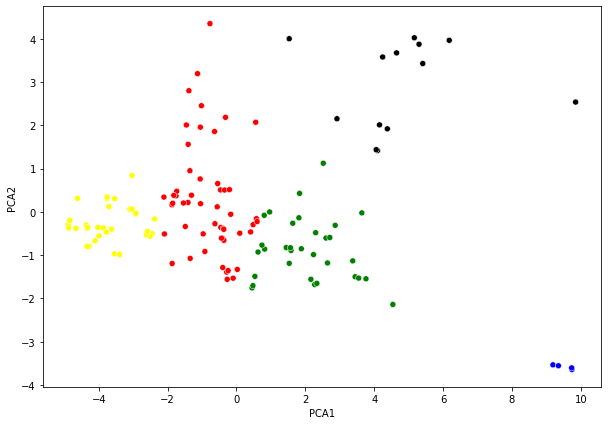

In [ ]:
# Membuat visualisasi klaster
plt.figure(figsize=(10,7))
ax = sns.scatterplot(x="PCA1", y="PCA2", hue = "clusters", data = data_k5, palette =['red','green','blue','black','yellow'], legend=False)
plt.show()

In [ ]:
# we store the cluster labels
labels = model.labels_
X = data
 
print(davies_bouldin_score(X, labels))

0.5312308882398692


In [ ]:
# Calculate Silhoutte Score
#
score = silhouette_score(X, labels, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.601


### Manual calculation

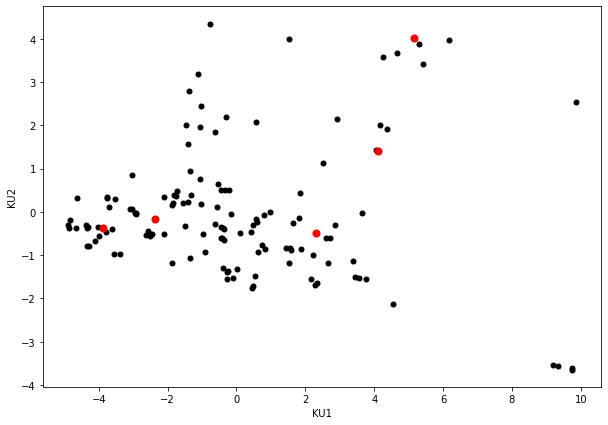

In [ ]:
K=4

# Select random observation as centroids
Centroids = data.loc[[2,102,30,130,78]]
plt.figure(figsize=(10,7))
plt.scatter(data["PCA1"],data["PCA2"],c='black',s=25)
plt.scatter(Centroids["PCA1"],Centroids["PCA2"],c='red',s=50)
plt.xlabel('KU1')
plt.ylabel('KU2')
plt.show()

In [ ]:
#Centroids = data.loc[[5,27,88,101]]
Centroids = np.array(Centroids)
Centroids

array([[ 4.09644444,  1.41636277],
       [-3.86324794, -0.37148853],
       [ 5.16513187,  4.02161568],
       [ 2.2986922 , -0.48269104],
       [-2.37700862, -0.16660796]])

In [ ]:
dist = np.linalg.norm(data - Centroids[0,:],axis=1).reshape(-1,1)
dist[:10,:]

array([[7.10397983],
       [1.51127631],
       [0.        ],
       [0.04423031],
       [2.40137652],
       [3.16973596],
       [5.28495701],
       [5.94417318],
       [3.99950273],
       [5.46933843]])

In [ ]:
dist = np.append(dist,np.linalg.norm(data - Centroids[1,:],axis=1).reshape(-1,1),axis=1)
dist[:10,:]

array([[ 7.10397983, 13.43134135],
       [ 1.51127631,  7.51144707],
       [ 0.        ,  8.15800925],
       [ 0.04423031,  8.12358339],
       [ 2.40137652, 10.02110535],
       [ 3.16973596,  5.76748087],
       [ 5.28495701,  2.87447473],
       [ 5.94417318,  2.23482542],
       [ 3.99950273,  4.34651946],
       [ 5.46933843,  2.83692799]])

In [ ]:
dist = np.append(dist,np.linalg.norm(data - Centroids[2,:],axis=1).reshape(-1,1),axis=1)
dist[:10,:]

array([[ 7.10397983, 13.43134135,  8.56217234],
       [ 1.51127631,  7.51144707,  4.32384914],
       [ 0.        ,  8.15800925,  2.81592535],
       [ 0.04423031,  8.12358339,  2.81331607],
       [ 2.40137652, 10.02110535,  0.64367113],
       [ 3.16973596,  5.76748087,  5.87646256],
       [ 5.28495701,  2.87447473,  7.29730718],
       [ 5.94417318,  2.23482542,  7.82459533],
       [ 3.99950273,  4.34651946,  6.37010463],
       [ 5.46933843,  2.83692799,  7.20553438]])

In [ ]:
dist = np.append(dist,np.linalg.norm(data - Centroids[3,:],axis=1).reshape(-1,1),axis=1)
dist[:10,:]

array([[ 7.10397983, 13.43134135,  8.56217234,  7.53732488,  7.53732488],
       [ 1.51127631,  7.51144707,  4.32384914,  1.4176089 ,  1.4176089 ],
       [ 0.        ,  8.15800925,  2.81592535,  2.61501787,  2.61501787],
       [ 0.04423031,  8.12358339,  2.81331607,  2.60221101,  2.60221101],
       [ 2.40137652, 10.02110535,  0.64367113,  4.99633307,  4.99633307],
       [ 3.16973596,  5.76748087,  5.87646256,  0.5563001 ,  0.5563001 ],
       [ 5.28495701,  2.87447473,  7.29730718,  3.40877457,  3.40877457],
       [ 5.94417318,  2.23482542,  7.82459533,  4.14207192,  4.14207192],
       [ 3.99950273,  4.34651946,  6.37010463,  1.82549974,  1.82549974],
       [ 5.46933843,  2.83692799,  7.20553438,  3.92273335,  3.92273335]])

In [ ]:
dist = np.append(dist,np.linalg.norm(data - Centroids[4,:],axis=1).reshape(-1,1),axis=1)
dist[:10,:]

array([[ 7.10397983, 13.43134135,  8.56217234,  7.53732488,  7.53732488,
        12.04771895],
       [ 1.51127631,  7.51144707,  4.32384914,  1.4176089 ,  1.4176089 ,
         6.01886438],
       [ 0.        ,  8.15800925,  2.81592535,  2.61501787,  2.61501787,
         6.66418718],
       [ 0.04423031,  8.12358339,  2.81331607,  2.60221101,  2.60221101,
         6.630304  ],
       [ 2.40137652, 10.02110535,  0.64367113,  4.99633307,  4.99633307,
         8.57623716],
       [ 3.16973596,  5.76748087,  5.87646256,  0.5563001 ,  0.5563001 ,
         4.31607798],
       [ 5.28495701,  2.87447473,  7.29730718,  3.40877457,  3.40877457,
         1.37956347],
       [ 5.94417318,  2.23482542,  7.82459533,  4.14207192,  4.14207192,
         0.82123137],
       [ 3.99950273,  4.34651946,  6.37010463,  1.82549974,  1.82549974,
         2.86262782],
       [ 5.46933843,  2.83692799,  7.20553438,  3.92273335,  3.92273335,
         1.51518661]])

In [ ]:
dist[134]

array([ 8.94136579,  0.7992202 , 10.76863553,  6.96184685,  2.2954357 ])

In [ ]:
classes = np.argmin(dist,axis=1)
classes

array([0, 3, 0, 0, 2, 3, 5, 5, 3, 5, 5, 3, 5, 5, 5, 3, 5, 1, 5, 1, 3, 1,
       3, 5, 1, 5, 1, 0, 3, 3, 2, 5, 0, 3, 5, 5, 5, 3, 3, 5, 5, 3, 3, 5,
       1, 2, 5, 1, 1, 3, 5, 1, 5, 1, 2, 3, 3, 3, 0, 5, 5, 5, 5, 5, 5, 3,
       5, 5, 3, 3, 3, 5, 5, 1, 3, 5, 3, 5, 5, 1, 1, 0, 3, 3, 2, 0, 3, 5,
       5, 5, 5, 5, 3, 5, 5, 3, 3, 5, 1, 3, 1, 2, 1, 3, 5, 1, 5, 1, 0, 3,
       3, 2, 0, 3, 5, 5, 3, 5, 5, 5, 5, 5, 3, 3, 5, 1, 5, 1, 2, 1, 3, 5,
       1, 5, 1])

In [ ]:
data['cluster'] = classes
data

,PCA1,PCA2,cluster
0,9.190095,-3.535531,0
1,3.640175,-0.024392,3
2,4.096444,1.416363,0
3,4.056736,1.435846,0
4,5.410273,3.426453,2
...,...,...,...
130,2.298692,-0.482691,3
131,-0.436206,-0.607883,5
132,-3.539341,0.305011,1
133,-3.035940,0.064091,5


In [ ]:
print(data[data['cluster']==0])
print(data[data['cluster']==1])

         PCA1      PCA2  cluster
0    9.190095 -3.535531        0
2    4.096444  1.416363        0
3    4.056736  1.435846        0
27   9.350249 -3.557139        0
32   4.381375  1.917651        0
58   2.520605  1.122921        0
81   9.741579 -3.643229        0
85   2.918049  2.150888        0
108  9.733553 -3.605648        0
112  4.153538  2.009006        0
         PCA1      PCA2  cluster
17  -3.705005  0.122649        1
19  -4.107918 -0.668113        1
21  -4.025586 -0.359931        1
24  -4.364751 -0.306143        1
26  -4.884491 -0.298461        1
44  -4.341488 -0.382521        1
47  -4.279895 -0.791914        1
48  -3.880114 -0.373680        1
51  -3.762658  0.311078        1
53  -4.842304 -0.199708        1
73  -3.993289 -0.555743        1
79  -3.543118 -0.970122        1
80  -4.619752  0.310751        1
98  -4.324977 -0.358362        1
100 -3.396591 -0.983736        1
102 -3.863248 -0.371489        1
105 -3.758237  0.342082        1
107 -4.876581 -0.370976        1
125 -3.775

In [ ]:
print(data[data['cluster']==2])

         PCA1      PCA2  cluster
4    5.410273  3.426453        2
30   5.165132  4.021616        2
45   4.648754  3.672042        2
54   9.848200  2.536134        2
84   5.301112  3.872463        2
101  1.530591  4.000126        2
111  6.178141  3.963082        2
128  4.244063  3.577312        2


In [ ]:
print(data[data['cluster']==3])

         PCA1      PCA2  cluster
1    3.640175 -0.024392        3
5    1.884051 -0.853558        3
8    0.482637 -0.297236        3
11   0.816371 -0.860951        3
15   2.643937 -1.181325        3
20   1.832158  0.426826        3
22   0.625263 -0.928961        3
28   1.443296 -0.825720        3
29   2.160953 -1.559306        3
33   0.578749 -0.158155        3
37   0.598154 -0.224839        3
38   0.023583 -1.330662        3
41   0.534577 -1.491561        3
42   3.444812 -1.500355        3
49   2.598792 -0.605551        3
55   1.812524 -0.137601        3
56   1.531626 -1.190660        3
57   4.542069 -2.140607        3
65   0.408560 -0.464905        3
68   0.095344 -0.493796        3
69   3.374868 -1.133430        3
70   0.558162  2.070096        3
74   2.866466 -0.312186        3
76   2.236436 -0.988513        3
82   1.584236 -0.893068        3
83   2.269791 -1.680118        3
86   1.634221 -0.263450        3
92  -0.096779 -1.533484        3
95   0.451121 -1.757918        3
96   3.547

In [ ]:
print(data[data['cluster']==4])

         PCA1      PCA2  cluster
6   -1.043600  0.187253        4
7   -1.754795  0.369368        4
9   -1.352988  0.950161        4
10  -1.403592  1.559194        4
12  -0.455883 -0.360481        4
13  -2.091997 -0.511223        4
14  -0.270204 -1.559812        4
16  -0.545798  0.654000        4
18  -2.107996  0.340379        4
23  -1.055029  0.759887        4
25  -2.932985 -0.051865        4
31  -1.382362  2.798476        4
34  -1.455028  2.006279        4
35  -1.735548  0.475927        4
36  -1.873793  0.162050        4
39  -0.384272 -0.383228        4
40  -2.451314 -0.505007        4
43  -0.464344  0.505675        4
46  -1.487467 -0.338906        4
50  -0.408547 -0.609414        4
52  -3.098216  0.062142        4
59  -0.917856 -0.916955        4
60  -0.560493  0.114972        4
61  -1.131781  3.192050        4
62  -0.283522 -1.392323        4
63  -1.869101 -1.193623        4
64  -1.407320  0.215581        4
66  -0.398654 -1.287430        4
67  -2.507758 -0.562923        4
71  -3.036

In [ ]:
unique, counts = np.unique(classes, return_counts=True)

print(np.asarray((unique, counts)).T)

[[ 0 10]
 [ 1 23]
 [ 2  8]
 [ 3 39]
 [ 5 55]]


In [ ]:
#calculate the means of each clusters
#data_0 = data[data['cluster']==0]
#data_1 = data[data['cluster']==1]
#data_2 = data[data['cluster']==2]
#data_3 = data[data['cluster']==3]
data_4 = data[data['cluster']==5]
print(data_4)
print(data_4.mean())

         PCA1      PCA2  cluster
6   -1.043600  0.187253        5
7   -1.754795  0.369368        5
9   -1.352988  0.950161        5
10  -1.403592  1.559194        5
12  -0.455883 -0.360481        5
13  -2.091997 -0.511223        5
14  -0.270204 -1.559812        5
16  -0.545798  0.654000        5
18  -2.107996  0.340379        5
23  -1.055029  0.759887        5
25  -2.932985 -0.051865        5
31  -1.382362  2.798476        5
34  -1.455028  2.006279        5
35  -1.735548  0.475927        5
36  -1.873793  0.162050        5
39  -0.384272 -0.383228        5
40  -2.451314 -0.505007        5
43  -0.464344  0.505675        5
46  -1.487467 -0.338906        5
50  -0.408547 -0.609414        5
52  -3.098216  0.062142        5
59  -0.917856 -0.916955        5
60  -0.560493  0.114972        5
61  -1.131781  3.192050        5
62  -0.283522 -1.392323        5
63  -1.869101 -1.193623        5
64  -1.407320  0.215581        5
66  -0.398654 -1.287430        5
67  -2.507758 -0.562923        5
71  -3.036

### Manual calculation (2nd iteration)

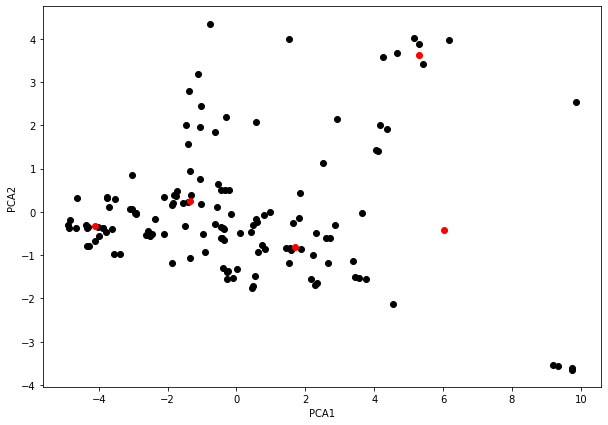

In [ ]:
K=4

# Select random observation as centroids
Centroids = np.array([[6.041, -0.428],
                      [-4.109, -0.332],
                      [5.290, 3.633],
                      [1.686, -0.808],
                      [-1.340, 0.261]])
Centroids = pd.DataFrame(Centroids, columns=['PCA1','PCA2'])
plt.figure(figsize=(10,7))
plt.scatter(data["PCA1"],data["PCA2"],c='black')
plt.scatter(Centroids["PCA1"],Centroids["PCA2"],c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [ ]:
Centroids = np.array(Centroids)
Centroids

array([[ 6.041, -0.428],
       [-4.109, -0.332],
       [ 5.29 ,  3.633],
       [ 1.686, -0.808],
       [-1.34 ,  0.261]])

In [ ]:
dist = np.linalg.norm(data - Centroids[0,:],axis=1).reshape(-1,1)
dist[:10,:]

array([[4.42420039],
       [2.43451397],
       [2.68010641],
       [2.72235618],
       [3.90571713],
       [4.17867506],
       [7.11126554],
       [7.83646658],
       [5.55990071],
       [7.52132923]])

In [ ]:
dist = np.append(dist,np.linalg.norm(data - Centroids[1,:],axis=1).reshape(-1,1),axis=1)
dist[:10,:]

array([[ 4.42420039, 13.6794935 ],
       [ 2.43451397,  7.75527829],
       [ 2.68010641,  8.38964187],
       [ 2.72235618,  8.35491038],
       [ 3.90571713, 10.23437977],
       [ 4.17867506,  6.01570299],
       [ 7.11126554,  3.10906724],
       [ 7.83646658,  2.45646106],
       [ 5.55990071,  4.59176884],
       [ 7.52132923,  3.03966063]])

In [ ]:
dist = np.append(dist,np.linalg.norm(data - Centroids[2,:],axis=1).reshape(-1,1),axis=1)
dist[:10,:]

array([[ 4.42420039, 13.6794935 ,  8.16079523],
       [ 2.43451397,  7.75527829,  4.01228593],
       [ 2.68010641,  8.38964187,  2.5175495 ],
       [ 2.72235618,  8.35491038,  2.51960841],
       [ 3.90571713, 10.23437977,  0.23901289],
       [ 4.17867506,  6.01570299,  5.63291162],
       [ 7.11126554,  3.10906724,  7.21024721],
       [ 7.83646658,  2.45646106,  7.76404673],
       [ 5.55990071,  4.59176884,  6.20946771],
       [ 7.52132923,  3.03966063,  7.16428085]])

In [ ]:
dist = np.append(dist,np.linalg.norm(data - Centroids[3,:],axis=1).reshape(-1,1),axis=1)
dist[:10,:]

array([[ 4.42420039, 13.6794935 ,  8.16079523,  7.98441415],
       [ 2.43451397,  7.75527829,  4.01228593,  2.1054317 ],
       [ 2.68010641,  8.38964187,  2.5175495 ,  3.27994392],
       [ 2.72235618,  8.35491038,  2.51960841,  3.26423558],
       [ 3.90571713, 10.23437977,  0.23901289,  5.63922013],
       [ 4.17867506,  6.01570299,  5.63291162,  0.20322333],
       [ 7.11126554,  3.10906724,  7.21024721,  2.9053823 ],
       [ 7.83646658,  2.45646106,  7.76404673,  3.63665549],
       [ 5.55990071,  4.59176884,  6.20946771,  1.30727279],
       [ 7.52132923,  3.03966063,  7.16428085,  3.51092315]])

In [ ]:
dist = np.append(dist,np.linalg.norm(data - Centroids[4,:],axis=1).reshape(-1,1),axis=1)
dist[:10,:]

array([[ 4.42420039, 13.6794935 ,  8.16079523,  7.98441415, 11.19359421],
       [ 2.43451397,  7.75527829,  4.01228593,  2.1054317 ,  4.98834595],
       [ 2.68010641,  8.38964187,  2.5175495 ,  3.27994392,  5.55785851],
       [ 2.72235618,  8.35491038,  2.51960841,  3.26423558,  5.52313542],
       [ 3.90571713, 10.23437977,  0.23901289,  5.63922013,  7.45562069],
       [ 4.17867506,  6.01570299,  5.63291162,  0.20322333,  3.41126727],
       [ 7.11126554,  3.10906724,  7.21024721,  2.9053823 ,  0.30543642],
       [ 7.83646658,  2.45646106,  7.76404673,  3.63665549,  0.42871691],
       [ 5.55990071,  4.59176884,  6.20946771,  1.30727279,  1.90620921],
       [ 7.52132923,  3.03966063,  7.16428085,  3.51092315,  0.68928351]])

In [ ]:
dist[134]

array([10.70351496,  0.55557547, 10.73138293,  6.36275667,  3.38386836])

In [ ]:
classes = np.argmin(dist,axis=1)
classes

array([0, 3, 2, 2, 2, 3, 4, 4, 3, 4, 4, 3, 4, 4, 3, 3, 4, 1, 4, 1, 3, 1,
       3, 4, 1, 1, 1, 0, 3, 3, 2, 4, 2, 3, 4, 4, 4, 3, 3, 4, 4, 3, 3, 4,
       1, 2, 4, 1, 1, 3, 4, 1, 1, 1, 2, 3, 3, 0, 3, 4, 4, 4, 4, 4, 4, 3,
       4, 4, 3, 3, 4, 1, 4, 1, 3, 1, 3, 4, 4, 1, 1, 0, 3, 3, 2, 2, 3, 4,
       4, 4, 4, 4, 3, 4, 1, 3, 3, 4, 1, 3, 1, 2, 1, 3, 4, 1, 1, 1, 0, 3,
       3, 2, 2, 3, 4, 4, 3, 4, 4, 4, 4, 4, 3, 3, 4, 1, 4, 1, 2, 1, 3, 4,
       1, 1, 1])

In [ ]:
data['cluster'] = classes
data

,PCA1,PCA2,cluster
0,9.190095,-3.535531,0
1,3.640175,-0.024392,3
2,4.096444,1.416363,2
3,4.056736,1.435846,2
4,5.410273,3.426453,2
...,...,...,...
130,2.298692,-0.482691,3
131,-0.436206,-0.607883,4
132,-3.539341,0.305011,1
133,-3.035940,0.064091,1


In [ ]:
print(data[data['cluster']==0])
print(data[data['cluster']==1])

         PCA1      PCA2  cluster
1    3.640175 -0.024392        0
2    4.096444  1.416363        0
3    4.056736  1.435846        0
5    1.884051 -0.853558        0
8    0.482637 -0.297236        0
11   0.816371 -0.860951        0
14  -0.270204 -1.559812        0
15   2.643937 -1.181325        0
20   1.832158  0.426826        0
22   0.625263 -0.928961        0
28   1.443296 -0.825720        0
29   2.160953 -1.559306        0
33   0.578749 -0.158155        0
37   0.598154 -0.224839        0
38   0.023583 -1.330662        0
41   0.534577 -1.491561        0
42   3.444812 -1.500355        0
49   2.598792 -0.605551        0
55   1.812524 -0.137601        0
56   1.531626 -1.190660        0
57   4.542069 -2.140607        0
58   2.520605  1.122921        0
62  -0.283522 -1.392323        0
65   0.408560 -0.464905        0
68   0.095344 -0.493796        0
69   3.374868 -1.133430        0
74   2.866466 -0.312186        0
76   2.236436 -0.988513        0
82   1.584236 -0.893068        0
83   2.269

In [ ]:
print(data[data['cluster']==2])

         PCA1      PCA2  cluster
6   -1.043600  0.187253        2
7   -1.754795  0.369368        2
9   -1.352988  0.950161        2
10  -1.403592  1.559194        2
12  -0.455883 -0.360481        2
..        ...       ...      ...
129 -3.628878 -0.397641        2
131 -0.436206 -0.607883        2
132 -3.539341  0.305011        2
133 -3.035940  0.064091        2
134 -4.662412 -0.380986        2

[73 rows x 3 columns]


In [ ]:
print(data[data['cluster']==3])

         PCA1      PCA2  cluster
4    5.410273  3.426453        3
30   5.165132  4.021616        3
32   4.381375  1.917651        3
45   4.648754  3.672042        3
61  -1.131781  3.192050        3
70   0.558162  2.070096        3
72  -0.770635  4.349665        3
84   5.301112  3.872463        3
85   2.918049  2.150888        3
101  1.530591  4.000126        3
111  6.178141  3.963082        3
112  4.153538  2.009006        3
128  4.244063  3.577312        3


In [ ]:
unique, counts = np.unique(classes, return_counts=True)

print(np.asarray((unique, counts)).T)

[[ 0  5]
 [ 1 30]
 [ 2 13]
 [ 3 39]
 [ 4 48]]


In [ ]:
#calculate the means of each clusters
#data_0 = data[data['cluster']==0]
#data_1 = data[data['cluster']==1]
#data_2 = data[data['cluster']==2]
data_3 = data[data['cluster']==3]
print(data_3)
print(data_3.mean())

         PCA1      PCA2  cluster
4    5.410273  3.426453        3
30   5.165132  4.021616        3
32   4.381375  1.917651        3
45   4.648754  3.672042        3
61  -1.131781  3.192050        3
70   0.558162  2.070096        3
72  -0.770635  4.349665        3
84   5.301112  3.872463        3
85   2.918049  2.150888        3
101  1.530591  4.000126        3
111  6.178141  3.963082        3
112  4.153538  2.009006        3
128  4.244063  3.577312        3
PCA1       3.275906
PCA2       3.247881
cluster    3.000000
dtype: float64


## Characteristics of each clusters (0,3,1,4,2)

In [ ]:
df = pd.read_excel('jabarData_fix.xlsx')
df['cluster'] = data['clusters']
df.head()

,kode_kabupaten_kota,nama_kabupaten_kota,tahun_ajaran,jumlah_sekolah_sd,jumlah_sekolah_smp,jumlah_sekolah_sma,jumlah_sekolah_smk,jumlah_sekolah_slb,jumlah_murid_sd,jumlah_murid_smp,jumlah_murid_sma,jumlah_murid_smk,jumlah_murid_slb,jumlah_guru_sd,jumlah_guru_smp,jumlah_guru_sma,jumlah_guru_smk,jumlah_guru_slb,cluster
0,3201,KABUPATEN BOGOR,2015/2016,1795,648,173,352,6,510841,202865,61153,113581,530,20491,8372,2950,4235,64,3
1,3202,KABUPATEN SUKABUMI,2015/2016,1209,324,77,155,11,231697,110222,59843,59507,1961,13490,5169,2353,2588,92,2
2,3203,KABUPATEN CIANJUR,2015/2016,1256,289,86,175,8,286310,104226,36226,45234,1625,10688,5398,3832,3592,528,0
3,3204,KABUPATEN BANDUNG,2015/2016,1415,304,107,137,43,304777,115259,46428,57456,599,14190,5462,2100,2639,394,0
4,3205,KABUPATEN GARUT,2015/2016,1586,364,120,171,33,370266,138763,47270,51498,2426,15396,5517,2208,2310,596,0


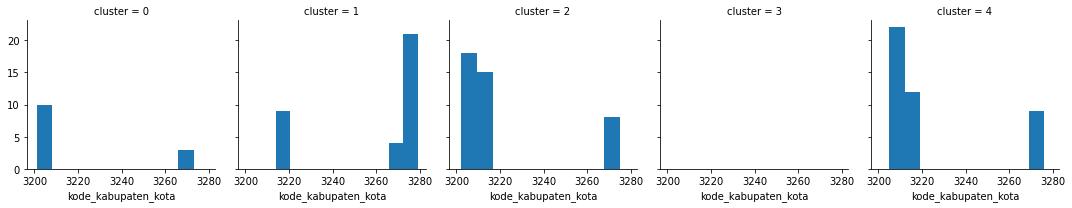

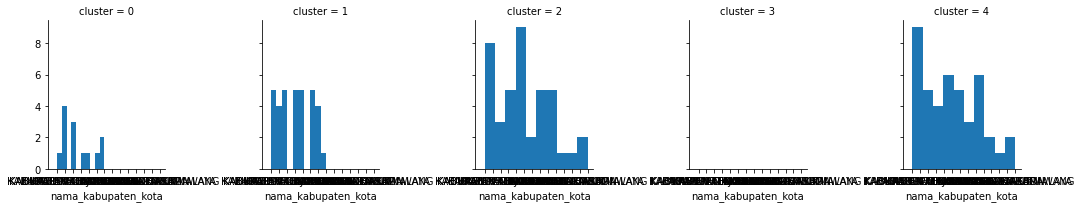

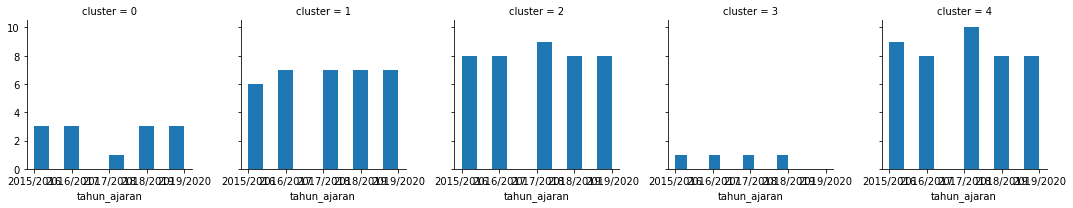

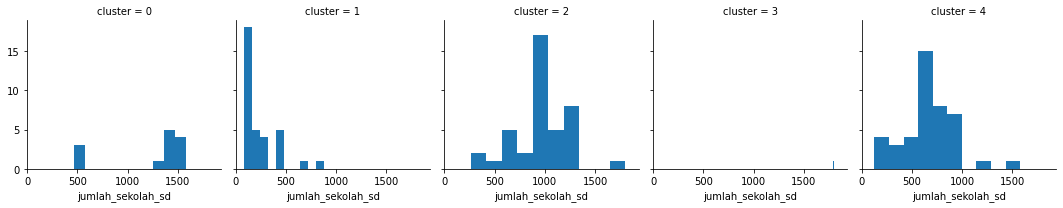

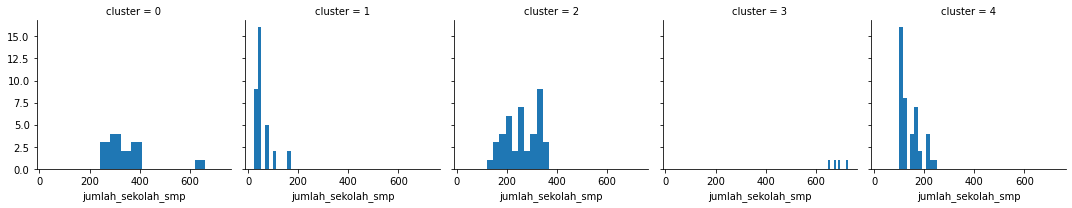

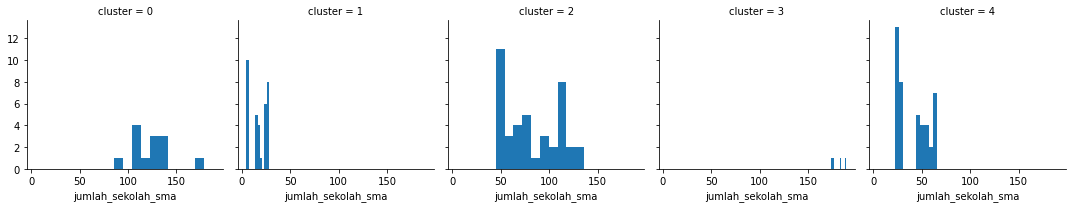

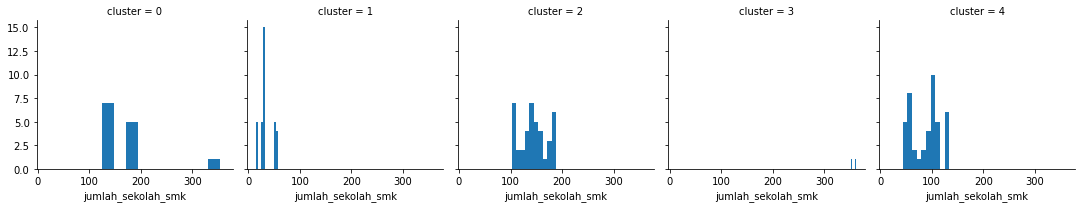

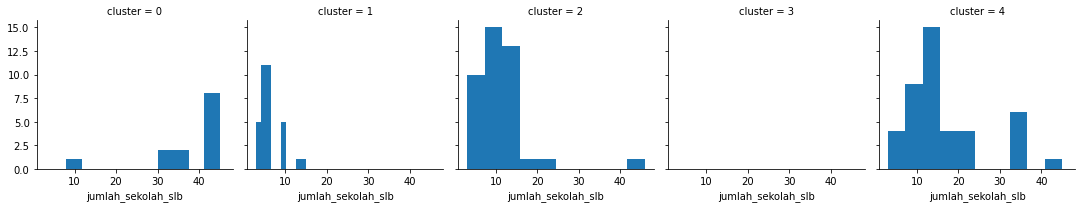

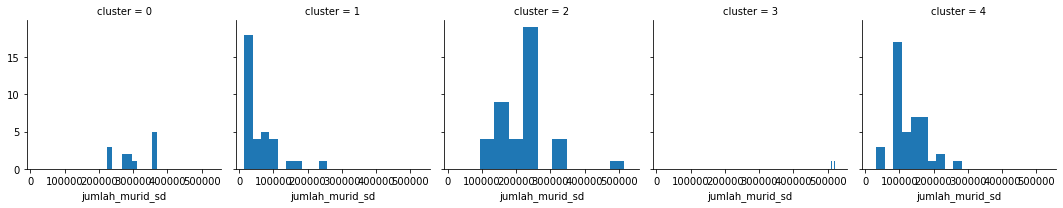

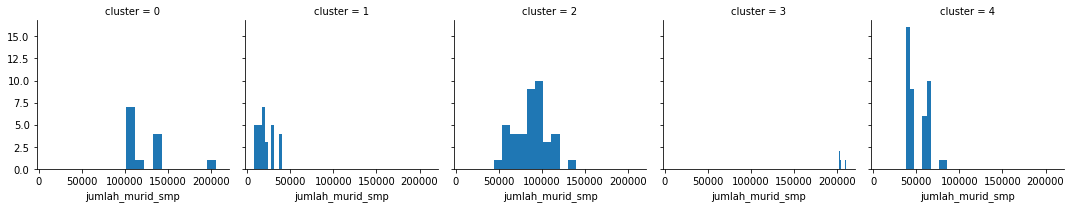

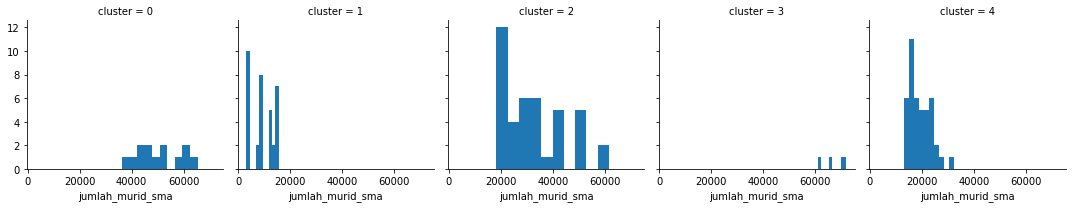

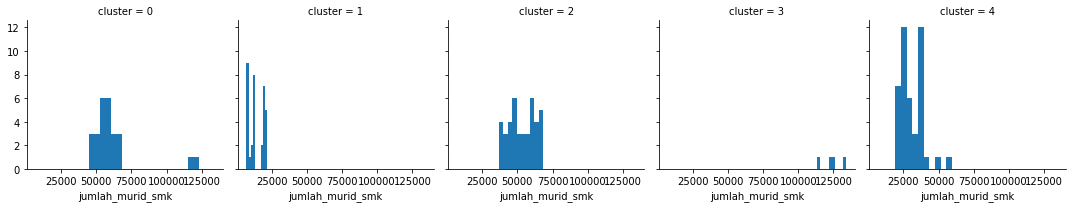

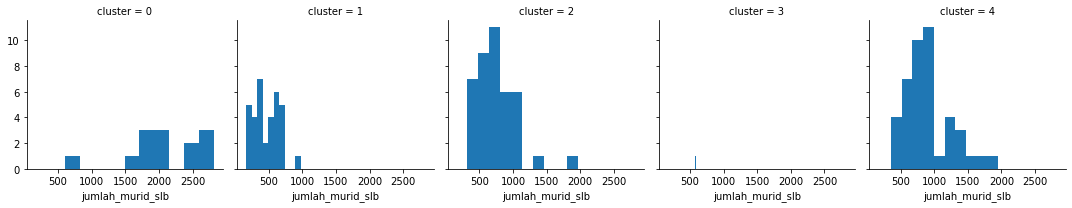

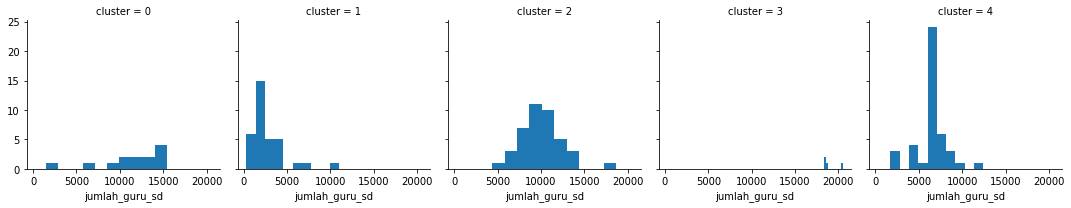

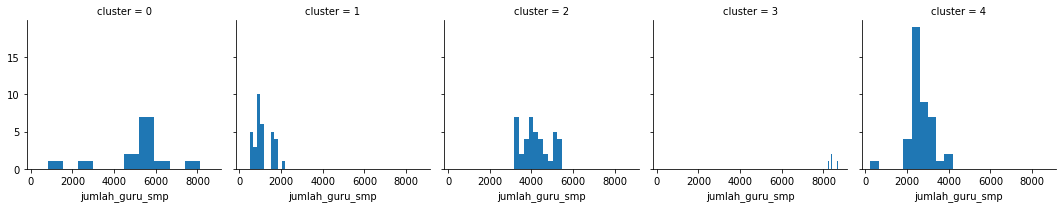

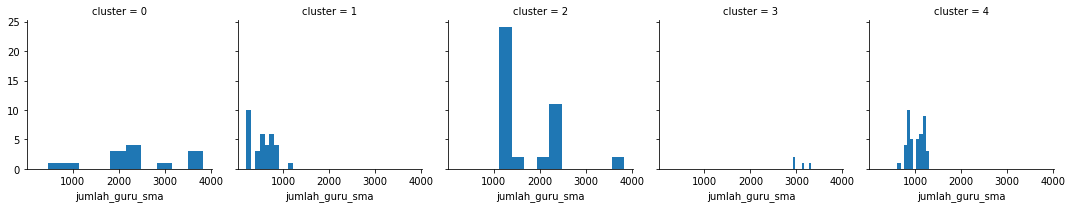

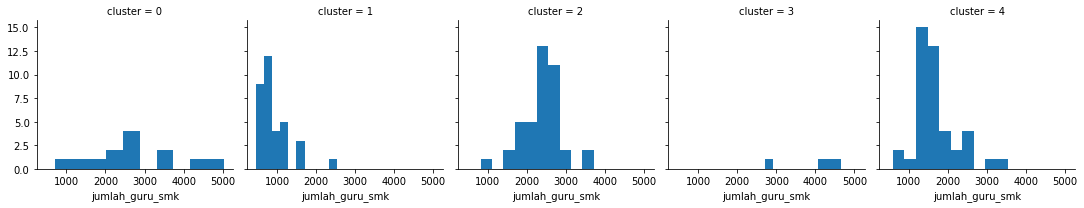

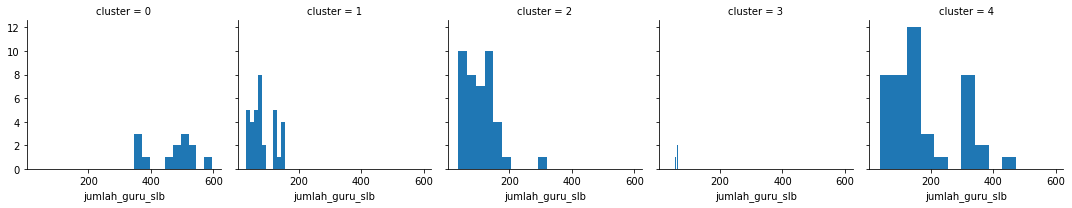

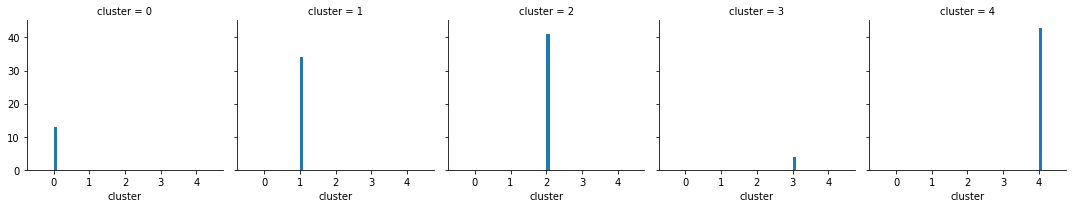

In [ ]:
# Interpretasi klaster yang terbentuk
for c in df:
    grid= sns.FacetGrid(df, col='cluster')
    grid.map(plt.hist, c)

In [ ]:
df_grouped = df.drop(['kode_kabupaten_kota','tahun_ajaran'], axis=1)
df_grouped['jumlah_sekolah'] = df_grouped['jumlah_sekolah_sd'] + df_grouped['jumlah_sekolah_smp'] + df_grouped['jumlah_sekolah_sma'] + df_grouped['jumlah_sekolah_smk'] + df_grouped['jumlah_sekolah_slb']
df_grouped['jumlah_murid'] = df_grouped['jumlah_murid_sd'] + df_grouped['jumlah_murid_smp'] + df_grouped['jumlah_murid_sma'] + df_grouped['jumlah_murid_smk'] + df_grouped['jumlah_murid_slb']
df_grouped['jumlah_guru'] = df_grouped['jumlah_guru_sd'] + df_grouped['jumlah_guru_smp'] + df_grouped['jumlah_guru_sma'] + df_grouped['jumlah_guru_smk'] + df_grouped['jumlah_guru_slb']
df_grouped = df_grouped[['nama_kabupaten_kota','jumlah_sekolah','jumlah_murid','jumlah_guru','cluster']]

df_grouped.head()

,nama_kabupaten_kota,jumlah_sekolah,jumlah_murid,jumlah_guru,cluster
0,KABUPATEN BOGOR,2974,888970,36112,3
1,KABUPATEN SUKABUMI,1776,463230,23692,2
2,KABUPATEN CIANJUR,1814,473621,24038,0
3,KABUPATEN BANDUNG,2006,524519,24785,0
4,KABUPATEN GARUT,2274,610223,26027,0


In [ ]:
df_grouped.groupby(['cluster']).mean()

,jumlah_sekolah,jumlah_murid,jumlah_guru
cluster,,,
0,1908.615385,542778.615385,21982.846154
1,352.764706,103583.970588,5501.235294
2,1445.878049,392447.658537,18396.414634
3,3047.750000,916548.750000,34506.750000
4,940.953488,231363.767442,11955.209302


## Restore the original data with its cluster

In [ ]:
df = pd.read_excel('jabarData_fix.xlsx')
df['cluster'] = data['clusters']
df.head()

,kode_kabupaten_kota,nama_kabupaten_kota,tahun_ajaran,jumlah_sekolah_sd,jumlah_sekolah_smp,jumlah_sekolah_sma,jumlah_sekolah_smk,jumlah_sekolah_slb,jumlah_murid_sd,jumlah_murid_smp,jumlah_murid_sma,jumlah_murid_smk,jumlah_murid_slb,jumlah_guru_sd,jumlah_guru_smp,jumlah_guru_sma,jumlah_guru_smk,jumlah_guru_slb,cluster
0,3201,KABUPATEN BOGOR,2015/2016,1795,648,173,352,6,510841,202865,61153,113581,530,20491,8372,2950,4235,64,3
1,3202,KABUPATEN SUKABUMI,2015/2016,1209,324,77,155,11,231697,110222,59843,59507,1961,13490,5169,2353,2588,92,2
2,3203,KABUPATEN CIANJUR,2015/2016,1256,289,86,175,8,286310,104226,36226,45234,1625,10688,5398,3832,3592,528,0
3,3204,KABUPATEN BANDUNG,2015/2016,1415,304,107,137,43,304777,115259,46428,57456,599,14190,5462,2100,2639,394,0
4,3205,KABUPATEN GARUT,2015/2016,1586,364,120,171,33,370266,138763,47270,51498,2426,15396,5517,2208,2310,596,0


In [ ]:
model.cluster_centers_

array([[-0.78039344,  0.25653586],
       [ 9.503869  , -3.58538688],
       [-3.67700521, -0.26539019],
       [ 2.05158596, -0.8741885 ],
       [ 4.76403147,  2.92299856]])

In [ ]:
df_k5.head()

,jumlah_sekolah_sd,jumlah_sekolah_smp,jumlah_sekolah_sma,jumlah_sekolah_smk,jumlah_sekolah_slb,jumlah_murid_sd,jumlah_murid_smp,jumlah_murid_sma,jumlah_murid_smk,jumlah_murid_slb,jumlah_guru_sd,jumlah_guru_smp,jumlah_guru_sma,jumlah_guru_smk,jumlah_guru_slb,cluster
0,1795,648,173,352,6,510841,202865,61153,113581,530,20491,8372,2950,4235,64,1
1,1209,324,77,155,11,231697,110222,59843,59507,1961,13490,5169,2353,2588,92,3
2,1256,289,86,175,8,286310,104226,36226,45234,1625,10688,5398,3832,3592,528,4
3,1415,304,107,137,43,304777,115259,46428,57456,599,14190,5462,2100,2639,394,4
4,1586,364,120,171,33,370266,138763,47270,51498,2426,15396,5517,2208,2310,596,4


### Cluster 0

In [ ]:
df[df['cluster']==0]

,kode_kabupaten_kota,nama_kabupaten_kota,tahun_ajaran,jumlah_sekolah_sd,jumlah_sekolah_smp,jumlah_sekolah_sma,jumlah_sekolah_smk,jumlah_sekolah_slb,jumlah_murid_sd,jumlah_murid_smp,jumlah_murid_sma,jumlah_murid_smk,jumlah_murid_slb,jumlah_guru_sd,jumlah_guru_smp,jumlah_guru_sma,jumlah_guru_smk,jumlah_guru_slb,cluster
2,3203,KABUPATEN CIANJUR,2015/2016,1256,289,86,175,8,286310,104226,36226,45234,1625,10688,5398,3832,3592,528,0
3,3204,KABUPATEN BANDUNG,2015/2016,1415,304,107,137,43,304777,115259,46428,57456,599,14190,5462,2100,2639,394,0
4,3205,KABUPATEN GARUT,2015/2016,1586,364,120,171,33,370266,138763,47270,51498,2426,15396,5517,2208,2310,596,0
30,3204,KABUPATEN BANDUNG,2016/2017,1419,318,107,137,43,369563,137706,50712,55435,2717,14012,5547,2226,2393,527,0
32,3206,KABUPATEN TASIKMALAYA,2016/2017,1579,382,124,175,33,282933,105079,42540,50451,1846,12277,5163,2096,2802,351,0
45,3271,KOTA BOGOR,2016/2017,466,241,132,126,45,230636,108001,61965,62352,2104,10148,5243,3835,3606,490,0
54,3201,KABUPATEN BOGOR,2017/2018,1411,662,178,353,45,369173,205524,65388,123024,2599,14000,8136,2930,4172,515,0
84,3204,KABUPATEN BANDUNG,2018/2019,1406,322,108,139,45,366582,135700,53167,58199,2565,14044,5779,2305,2532,512,0
85,3205,KABUPATEN GARUT,2018/2019,1584,381,124,179,34,277816,103971,44737,53698,1768,6164,2448,873,1643,348,0
101,3273,KOTA BANDUNG,2018/2019,471,246,138,125,45,225848,102933,60866,64971,1966,1537,809,465,721,485,0


### Cluster 1

In [ ]:
df[df['cluster']==1]

,kode_kabupaten_kota,nama_kabupaten_kota,tahun_ajaran,jumlah_sekolah_sd,jumlah_sekolah_smp,jumlah_sekolah_sma,jumlah_sekolah_smk,jumlah_sekolah_slb,jumlah_murid_sd,jumlah_murid_smp,jumlah_murid_sma,jumlah_murid_smk,jumlah_murid_slb,jumlah_guru_sd,jumlah_guru_smp,jumlah_guru_sma,jumlah_guru_smk,jumlah_guru_slb,cluster
17,3218,KABUPATEN PANGANDARAN,2015/2016,284,52,6,30,6,51501,22358,9138,18120,568,2193,1031,574,806,148,1
19,3272,KOTA SUKABUMI,2015/2016,121,44,17,32,3,33038,16240,8248,11465,181,1862,1060,758,742,69,1
21,3274,KOTA CIREBON,2015/2016,161,43,24,30,5,36292,19884,12925,11219,383,2698,931,226,591,74,1
24,3277,KOTA CIMAHI,2015/2016,125,36,16,24,9,33195,13205,3651,7141,326,1643,846,495,746,41,1
25,3278,KOTA TASIKMALAYA,2015/2016,231,72,28,53,6,64568,28962,14104,18030,658,3239,1672,855,1166,122,1
26,3279,KOTA BANJAR,2015/2016,86,24,5,15,6,15826,7847,3211,7760,286,1032,509,198,473,63,1
40,3214,KABUPATEN PURWAKARTA,2016/2017,404,172,25,58,6,99192,40352,15581,21125,592,4495,1844,644,1030,76,1
44,3218,KABUPATEN PANGANDARAN,2016/2017,282,53,6,30,5,32899,13155,3977,8242,364,2325,913,235,574,70,1
47,3273,KOTA BANDUNG,2016/2017,121,44,18,32,3,33166,16461,8330,11948,179,1549,800,474,717,38,1
48,3274,KOTA CIREBON,2016/2017,157,44,24,30,5,35933,19403,12759,11936,395,1732,1018,731,732,67,1


### Cluster 2

In [ ]:
df[df['cluster']==2]

,kode_kabupaten_kota,nama_kabupaten_kota,tahun_ajaran,jumlah_sekolah_sd,jumlah_sekolah_smp,jumlah_sekolah_sma,jumlah_sekolah_smk,jumlah_sekolah_slb,jumlah_murid_sd,jumlah_murid_smp,jumlah_murid_sma,jumlah_murid_smk,jumlah_murid_slb,jumlah_guru_sd,jumlah_guru_smp,jumlah_guru_sma,jumlah_guru_smk,jumlah_guru_slb,cluster
1,3202,KABUPATEN SUKABUMI,2015/2016,1209,324,77,155,11,231697,110222,59843,59507,1961,13490,5169,2353,2588,92,2
5,3206,KABUPATEN TASIKMALAYA,2015/2016,1086,251,65,133,13,244251,97139,25189,46921,522,11475,4403,2413,2707,150,2
8,3209,KABUPATEN CIREBON,2015/2016,923,184,45,107,14,201754,78071,21728,48439,800,9537,3987,1117,2179,146,2
11,3212,KABUPATEN INDRAMAYU,2015/2016,894,203,56,140,5,235032,88806,26205,38482,754,9629,4133,1159,2387,145,2
14,3215,KABUPATEN KARAWANG,2015/2016,897,152,48,108,3,159506,62883,18537,45080,353,8368,3432,1210,2507,50,2
15,3216,KABUPATEN BEKASI,2015/2016,951,322,106,180,11,254504,94614,40886,64778,883,12939,4271,1297,2668,78,2
20,3273,KOTA BANDUNG,2015/2016,819,239,135,126,46,226340,88576,32287,56133,313,10522,3934,1334,1833,111,2
22,3275,KOTA BEKASI,2015/2016,707,263,111,149,14,167103,64644,22955,36956,667,9869,3181,1248,2154,38,2
28,3202,KABUPATEN SUKABUMI,2016/2017,1211,330,76,156,11,233031,88590,31692,40263,805,9174,3832,1351,1802,105,2
29,3203,KABUPATEN CIANJUR,2016/2017,1257,306,92,181,8,242707,96258,30570,55129,599,11397,4183,1304,2710,73,2


### Cluster 3

In [ ]:
df[df['cluster']==3]

,kode_kabupaten_kota,nama_kabupaten_kota,tahun_ajaran,jumlah_sekolah_sd,jumlah_sekolah_smp,jumlah_sekolah_sma,jumlah_sekolah_smk,jumlah_sekolah_slb,jumlah_murid_sd,jumlah_murid_smp,jumlah_murid_sma,jumlah_murid_smk,jumlah_murid_slb,jumlah_guru_sd,jumlah_guru_smp,jumlah_guru_sma,jumlah_guru_smk,jumlah_guru_slb,cluster
0,3201,KABUPATEN BOGOR,2015/2016,1795,648,173,352,6,510841,202865,61153,113581,530,20491,8372,2950,4235,64,3
27,3201,KABUPATEN BOGOR,2016/2017,1815,673,176,356,6,515245,202606,66121,121766,567,18579,8216,2933,4293,58,3
81,3201,KABUPATEN BOGOR,2018/2019,1823,690,183,358,6,520803,204872,69802,125748,549,18320,8374,3125,4646,57,3
108,3201,KABUPATEN BOGOR,2019/2020,1846,729,189,361,6,532036,210751,71831,133945,583,18501,8723,3314,2712,64,3


### Cluster 4

In [ ]:
df[df['cluster']==4]

,kode_kabupaten_kota,nama_kabupaten_kota,tahun_ajaran,jumlah_sekolah_sd,jumlah_sekolah_smp,jumlah_sekolah_sma,jumlah_sekolah_smk,jumlah_sekolah_slb,jumlah_murid_sd,jumlah_murid_smp,jumlah_murid_sma,jumlah_murid_smk,jumlah_murid_slb,jumlah_guru_sd,jumlah_guru_smp,jumlah_guru_sma,jumlah_guru_smk,jumlah_guru_slb,cluster
6,3207,KABUPATEN CIAMIS,2015/2016,743,110,26,61,22,142765,62051,20259,33354,711,6913,2937,1092,1598,86,4
7,3208,KABUPATEN KUNINGAN,2015/2016,651,99,28,47,14,103195,41070,16997,24984,819,6721,2311,941,1480,149,4
9,3210,KABUPATEN MAJALENGKA,2015/2016,667,104,22,56,13,106532,45466,20004,37941,645,6746,2484,864,1500,354,4
10,3211,KABUPATEN SUMEDANG,2015/2016,599,106,25,86,34,104121,44878,14632,23106,1134,6936,2411,778,1372,152,4
12,3213,KABUPATEN SUBANG,2015/2016,876,156,44,104,10,163872,64411,15655,34178,795,8489,3166,1058,1852,126,4
13,3214,KABUPATEN PURWAKARTA,2015/2016,403,171,25,58,6,99447,39436,14114,19320,456,4553,2156,1238,1719,113,4
16,3217,KABUPATEN BANDUNG BARAT,2015/2016,700,160,54,96,18,157541,61414,22221,26631,899,7566,2822,1154,1334,214,4
18,3271,KOTA BOGOR,2015/2016,262,120,52,102,10,95375,39503,12947,19543,1302,4916,1838,618,980,79,4
23,3276,KOTA DEPOK,2015/2016,445,208,62,131,13,113511,38998,14282,24978,680,7002,2363,838,1239,340,4
31,3205,KABUPATEN GARUT,2016/2017,600,108,26,90,34,104159,44576,15893,25248,1538,6177,244,879,1547,325,4


## Naive Bayes Classification of 5 clusters

In [ ]:
data_k5 = data.copy()

In [ ]:
df_k5 = df.copy()
df_k5['cluster'] = data_k5['clusters']
df_k5.head()

,jumlah_sekolah_sd,jumlah_sekolah_smp,jumlah_sekolah_sma,jumlah_sekolah_smk,jumlah_sekolah_slb,jumlah_murid_sd,jumlah_murid_smp,jumlah_murid_sma,jumlah_murid_smk,jumlah_murid_slb,jumlah_guru_sd,jumlah_guru_smp,jumlah_guru_sma,jumlah_guru_smk,jumlah_guru_slb,cluster
0,1795,648,173,352,6,510841,202865,61153,113581,530,20491,8372,2950,4235,64,1
1,1209,324,77,155,11,231697,110222,59843,59507,1961,13490,5169,2353,2588,92,3
2,1256,289,86,175,8,286310,104226,36226,45234,1625,10688,5398,3832,3592,528,4
3,1415,304,107,137,43,304777,115259,46428,57456,599,14190,5462,2100,2639,394,4
4,1586,364,120,171,33,370266,138763,47270,51498,2426,15396,5517,2208,2310,596,4


In [ ]:
df_k5['cluster'].value_counts()

0    52
2    34
3    32
4    13
1     4
Name: cluster, dtype: int64

In [ ]:
df = df_k5.copy()

In [ ]:
df.head()

,jumlah_sekolah_sd,jumlah_sekolah_smp,jumlah_sekolah_sma,jumlah_sekolah_smk,jumlah_sekolah_slb,jumlah_murid_sd,jumlah_murid_smp,jumlah_murid_sma,jumlah_murid_smk,jumlah_murid_slb,jumlah_guru_sd,jumlah_guru_smp,jumlah_guru_sma,jumlah_guru_smk,jumlah_guru_slb,cluster
0,1795,648,173,352,6,510841,202865,61153,113581,530,20491,8372,2950,4235,64,2
1,1209,324,77,155,11,231697,110222,59843,59507,1961,13490,5169,2353,2588,92,1
2,1256,289,86,175,8,286310,104226,36226,45234,1625,10688,5398,3832,3592,528,3
3,1415,304,107,137,43,304777,115259,46428,57456,599,14190,5462,2100,2639,394,3
4,1586,364,120,171,33,370266,138763,47270,51498,2426,15396,5517,2208,2310,596,3


### Standardizing data

In [ ]:
df.drop(['kode_kabupaten_kota','nama_kabupaten_kota','tahun_ajaran'], axis=1, inplace=True)

In [ ]:
df_scaled = df.drop('cluster', axis=1)
scaler = StandardScaler()
scaler.fit(df_scaled)
scaled_features = scaler.transform(df_scaled)
df_scaled = pd.DataFrame(scaled_features,columns = df_scaled.columns)
df_scaled.head()

,jumlah_sekolah_sd,jumlah_sekolah_smp,jumlah_sekolah_sma,jumlah_sekolah_smk,jumlah_sekolah_slb,jumlah_murid_sd,jumlah_murid_smp,jumlah_murid_sma,jumlah_murid_smk,jumlah_murid_slb,jumlah_guru_sd,jumlah_guru_smp,jumlah_guru_sma,jumlah_guru_smk,jumlah_guru_slb
0,2.345096,3.261904,2.597434,3.499660,-0.699109,3.020501,3.143158,2.196097,3.064478,-0.597463,3.036825,2.913933,1.974548,2.525110,-0.704436
1,1.056642,0.940313,0.402992,0.684456,-0.267363,0.568525,1.014200,2.116059,0.834614,2.033752,1.405713,1.131539,1.258684,0.767990,-0.490731
2,1.159983,0.689524,0.608721,0.970264,-0.526411,1.048241,0.876411,0.673103,0.246034,1.415940,0.752895,1.258972,3.032156,1.839119,2.836966
3,1.509580,0.797005,1.088755,0.427229,2.495814,1.210454,1.129952,1.296426,0.750036,-0.470591,1.568801,1.294587,0.955311,0.822400,1.814233
4,1.885562,1.226930,1.385919,0.913102,1.632321,1.785703,1.670079,1.347871,0.504344,2.888758,1.849778,1.325193,1.084814,0.471403,3.355964


### Defining X and y

In [ ]:
X = df_scaled
y = df['cluster']

### Scenario: 70:30 (Acc:95%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)

print(np.asarray((unique, counts)).T)

[[ 0 30]
 [ 1  2]
 [ 2 27]
 [ 3 25]
 [ 4 10]]


In [ ]:
y_pred  =  classifier.predict(X_test)

In [ ]:
y_pred  

array([4, 2, 0, 4, 2, 2, 1, 4, 2, 2, 1, 4, 1, 2, 4, 4, 2, 2, 4, 2, 4, 1,
       2, 4, 2, 1, 4, 0, 1, 4, 0, 4, 0, 4, 1, 4, 2, 0, 1, 4, 1],
      dtype=int32)

In [ ]:
y_test

120    4
33     2
45     0
126    4
83     2
8      2
52     1
104    4
22     2
113    2
48     1
97     4
24     1
76     2
43     4
90     4
54     0
68     4
131    4
92     2
7      4
26     1
95     2
10     4
62     2
100    1
16     4
2      0
51     1
63     4
85     0
50     4
30     0
114    4
71     1
61     4
56     2
112    0
129    1
13     4
44     1
Name: cluster, dtype: int32

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

print(ac)
print(cm)

0.9512195121951219
[[22  0  0  0  0]
 [ 0  1  0  0  1]
 [ 0  0  7  0  0]
 [ 0  0  0  6  1]
 [ 0  0  0  0  3]]


In [ ]:
y_train_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
ac = accuracy_score(y_train,y_train_pred)
print(ac)
print(cm)

0.9787234042553191
[[ 7  0  0  0  0]
 [ 0 25  0  0  0]
 [ 0  0 29  0  2]
 [ 0  0  0  4  0]
 [ 0  0  0  0 27]]


In [ ]:
val = [1795, 648, 173, 352, 6, 510841, 202865, 61153, 113581, 530, 20491, 8372, 2950, 4235, 64]	
val = scaler.transform([val])

classifier.predict(val)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


array([3], dtype=int32)

In [ ]:
df.tail()

,jumlah_sekolah_sd,jumlah_sekolah_smp,jumlah_sekolah_sma,jumlah_sekolah_smk,jumlah_sekolah_slb,jumlah_murid_sd,jumlah_murid_smp,jumlah_murid_sma,jumlah_murid_smk,jumlah_murid_slb,jumlah_guru_sd,jumlah_guru_smp,jumlah_guru_sma,jumlah_guru_smk,jumlah_guru_slb,cluster
130,713,287,111,147,12,250416,94772,42650,67073,1005,10823,4704,2404,822,148,2
131,454,234,66,131,13,168289,65724,24426,40210,657,6650,3208,1231,711,74,4
132,125,40,16,24,9,51053,20814,9215,19692,639,1983,932,514,1698,143,1
133,229,75,27,52,6,64854,28835,14730,20324,723,2972,1628,791,714,130,1
134,86,26,5,17,5,15766,8112,3378,8549,331,956,534,191,1257,56,1


In [ ]:
val = [90, 100, 50, 35, 6, 20000, 10000, 5000, 9000, 270, 1000, 430, 200, 2000, 60]	
val = scaler.transform([val])

classifier.predict(val)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


array([1], dtype=int32)

### Scenario: 75:25 (Acc: 94%)

In [ ]:
X = df_scaled
y = df['cluster']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred  =  classifier.predict(X_test)

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)

print(np.asarray((unique, counts)).T)

[[ 0 34]
 [ 1  3]
 [ 2 28]
 [ 3 26]
 [ 4 10]]


In [ ]:
y_pred  

array([1, 4, 1, 1, 2, 2, 4, 2, 1, 0, 1, 4, 0, 1, 4, 4, 1, 0, 0, 0, 0, 1,
       4, 4, 4, 0, 0, 2, 2, 1, 4, 2, 4, 0], dtype=int32)

In [ ]:
y_test

98     1
67     1
105    1
19     1
42     2
62     2
12     4
110    2
125    1
128    0
44     1
40     1
27     3
100    1
119    2
31     4
51     1
4      0
84     0
81     3
85     0
26     1
16     4
18     4
10     4
111    0
45     0
11     2
123    2
80     1
104    4
83     2
36     4
0      3
Name: cluster, dtype: int32

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

print(ac)
print(cm)

0.8823529411764706
[[16  0  0  2  0]
 [ 0  0  0  0  1]
 [ 0  0  6  0  0]
 [ 0  0  0  5  1]
 [ 0  0  0  0  3]]


In [ ]:
y_train_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
ac = accuracy_score(y_train,y_train_pred)
print(ac)
print(cm)

0.9702970297029703
[[ 7  0  0  0  0]
 [ 0 23  0  0  0]
 [ 0  0 32  0  2]
 [ 0  0  0  1  0]
 [ 0  0  1  0 35]]


In [ ]:
val = [1795, 648, 173, 352, 6, 510841, 202865, 61153, 113581, 530, 20491, 8372, 2950, 4235, 64]	
val = scaler.transform([val])

classifier.predict(val)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


array([0], dtype=int32)

In [ ]:
df.tail()

,jumlah_sekolah_sd,jumlah_sekolah_smp,jumlah_sekolah_sma,jumlah_sekolah_smk,jumlah_sekolah_slb,jumlah_murid_sd,jumlah_murid_smp,jumlah_murid_sma,jumlah_murid_smk,jumlah_murid_slb,jumlah_guru_sd,jumlah_guru_smp,jumlah_guru_sma,jumlah_guru_smk,jumlah_guru_slb,cluster
130,713,287,111,147,12,250416,94772,42650,67073,1005,10823,4704,2404,822,148,2
131,454,234,66,131,13,168289,65724,24426,40210,657,6650,3208,1231,711,74,4
132,125,40,16,24,9,51053,20814,9215,19692,639,1983,932,514,1698,143,1
133,229,75,27,52,6,64854,28835,14730,20324,723,2972,1628,791,714,130,1
134,86,26,5,17,5,15766,8112,3378,8549,331,956,534,191,1257,56,1


In [ ]:
val = [90, 100, 50, 35, 6, 20000, 10000, 5000, 9000, 270, 1000, 430, 200, 2000, 60]	
val = scaler.transform([val])

classifier.predict(val)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


array([1], dtype=int32)

### Scenario: 80:20 (Acc: 92%)

In [ ]:
X = df_scaled
y = df['cluster']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)

print(np.asarray((unique, counts)).T)

[[ 0 40]
 [ 1  3]
 [ 2 29]
 [ 3 26]
 [ 4 10]]


In [ ]:
y_pred  =  classifier.predict(X_test)

In [ ]:
y_pred  

array([4, 2, 0, 4, 2, 2, 1, 4, 2, 2, 1, 4, 1, 2, 4, 4, 0, 2, 4, 2, 4, 1,
       2, 4, 2, 1, 4], dtype=int32)

In [ ]:
y_test

120    4
33     2
45     0
126    4
83     2
8      2
52     1
104    4
22     2
113    2
48     1
97     4
24     1
76     2
43     4
90     4
54     0
68     4
131    4
92     2
7      4
26     1
95     2
10     4
62     2
100    1
16     4
Name: cluster, dtype: int32

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

print(ac)
print(cm)

0.9259259259259259
[[12  0  0  0  0]
 [ 0  0  0  0  1]
 [ 0  0  5  0  0]
 [ 0  0  0  5  1]
 [ 0  0  0  0  3]]


In [ ]:
y_train_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
ac = accuracy_score(y_train,y_train_pred)
print(ac)
print(cm)

0.9814814814814815
[[11  0  0  0  0]
 [ 0 29  0  0  0]
 [ 0  0 30  0  2]
 [ 0  0  0  4  0]
 [ 0  0  0  0 32]]


In [ ]:
val = [1795, 648, 173, 352, 6, 510841, 202865, 61153, 113581, 530, 20491, 8372, 2950, 4235, 64]	
val = scaler.transform([val])

classifier.predict(val)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


array([1], dtype=int32)

In [ ]:
df.tail()

,jumlah_sekolah_sd,jumlah_sekolah_smp,jumlah_sekolah_sma,jumlah_sekolah_smk,jumlah_sekolah_slb,jumlah_murid_sd,jumlah_murid_smp,jumlah_murid_sma,jumlah_murid_smk,jumlah_murid_slb,jumlah_guru_sd,jumlah_guru_smp,jumlah_guru_sma,jumlah_guru_smk,jumlah_guru_slb,cluster
130,713,287,111,147,12,250416,94772,42650,67073,1005,10823,4704,2404,822,148,3
131,454,234,66,131,13,168289,65724,24426,40210,657,6650,3208,1231,711,74,3
132,125,40,16,24,9,51053,20814,9215,19692,639,1983,932,514,1698,143,0
133,229,75,27,52,6,64854,28835,14730,20324,723,2972,1628,791,714,130,0
134,86,26,5,17,5,15766,8112,3378,8549,331,956,534,191,1257,56,0


In [ ]:
val = [90, 100, 50, 35, 6, 20000, 10000, 5000, 9000, 270, 1000, 430, 200, 2000, 60]	
val = scaler.transform([val])

classifier.predict(val)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


array([0], dtype=int32)

### Scenario: 90:10 (Acc:85%)

In [ ]:
X = df_scaled
y = df['cluster']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 123)

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)

print(np.asarray((unique, counts)).T)

[[ 0 47]
 [ 1  3]
 [ 2 31]
 [ 3 29]
 [ 4 11]]


In [ ]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred  =  classifier.predict(X_test)

In [ ]:
y_pred  

array([1, 4, 1, 1, 2, 2, 4, 2, 1, 0, 1, 4, 3, 1], dtype=int32)

In [ ]:
y_test

98     1
67     1
105    1
19     1
42     2
62     2
12     4
110    2
125    1
128    0
44     1
40     1
27     3
100    1
Name: cluster, dtype: int32

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

print(ac)
print(cm)

0.9285714285714286
[[5 0 0 0 0]
 [0 0 0 0 1]
 [0 0 3 0 0]
 [0 0 0 3 0]
 [0 0 0 0 2]]


In [ ]:
y_train_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
ac = accuracy_score(y_train,y_train_pred)
print(ac)
print(cm)

0.9917355371900827
[[26  0  0  0  0]
 [ 0 30  0  0  0]
 [ 0  0  4  0  0]
 [ 0  1  0 49  0]
 [ 0  0  0  0 11]]


In [ ]:
val = [1795, 648, 173, 352, 6, 510841, 202865, 61153, 113581, 530, 20491, 8372, 2950, 4235, 64]	
val = scaler.transform([val])

classifier.predict(val)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


array([2], dtype=int32)

In [ ]:
df.tail()

,jumlah_sekolah_sd,jumlah_sekolah_smp,jumlah_sekolah_sma,jumlah_sekolah_smk,jumlah_sekolah_slb,jumlah_murid_sd,jumlah_murid_smp,jumlah_murid_sma,jumlah_murid_smk,jumlah_murid_slb,jumlah_guru_sd,jumlah_guru_smp,jumlah_guru_sma,jumlah_guru_smk,jumlah_guru_slb,cluster
130,713,287,111,147,12,250416,94772,42650,67073,1005,10823,4704,2404,822,148,3
131,454,234,66,131,13,168289,65724,24426,40210,657,6650,3208,1231,711,74,3
132,125,40,16,24,9,51053,20814,9215,19692,639,1983,932,514,1698,143,0
133,229,75,27,52,6,64854,28835,14730,20324,723,2972,1628,791,714,130,0
134,86,26,5,17,5,15766,8112,3378,8549,331,956,534,191,1257,56,0


In [ ]:
val = [90, 100, 50, 35, 6, 20000, 10000, 5000, 9000, 270, 1000, 430, 200, 2000, 60]	
val = scaler.transform([val])

classifier.predict(val)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


array([0], dtype=int32)

In [ ]:
val = [90, 100, 50, 35, 6, 20000, 10000, 5000, 9000, 270, 1000, 430, 200, 2000, 60]	
val = scaler.transform([val])
val = pca_2.transform(val)

model.predict(val)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


array([0], dtype=int32)

In [ ]:
val = [1000, 300, 200, 300, 30, 300000, 100000, 50000, 70000, 5000, 10000, 5000, 1000, 1200, 60]	
val = scaler.transform([val])

classifier.predict(val)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


array([2], dtype=int32)

In [ ]:
val = [1000, 300, 200, 300, 30, 300000, 100000, 50000, 70000, 5000, 10000, 5000, 1000, 1200, 60]
val = scaler.transform([val])
val = pca_2.transform(val)

model.predict(val)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


array([2], dtype=int32)